In [21]:
%load_ext autoreload
# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import numpy as np
import random
import math
import EoN
import seaborn as sns
import time

# New Imports
#from ctrace.contact_tracing import *
#from ctrace.constraint import *
#from ctrace.solve import *
#from ctrace.simulation import *
#from ctrace.restricted import *
from ctrace.simulation import *
from ctrace.dataset import *
from ctrace.recommender import *
from ctrace.problem_label import *
from ctrace.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
G = load_graph("montgomery")
print(G.size())

G_node = len(G.nodes)

648667


In [6]:
I = set()
#with open(PROJECT_ROOT / "data" / "SIR_Cache" / "t7.json", 'r') as infile:
    
#    j = json.load(infile)
    #(S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])

    # Make infected_queue a list of sets
    #infected_queue = [set(s) for s in infected_queue]
    #I = I.union(*infected_queue)
    #I = list(I)

infected_size = 1000

nodeList = list(G.nodes)

I = {nodeList.index(random.randint(0, G_node-1)) for i in range(0, infected_size)}
S = set(G.nodes) - I

I_q = {nodeList.index(random.randint(0, G_node-1)) for i in range(0, infected_size)}
S_q = set(G.nodes) - I_q

In [7]:
state = SimulationState(G, (list(S), list(I), []), (list(S), list(I), []), 2000, 1, 1, 0, .8, .8)

In [8]:
#to_quarantine = DegGreedy(state)
#state.step(to_quarantine)
state.step(set())

V1_k = state.SIR_known.V1
V1_r = state.SIR_real.V1

V2_k = state.SIR_known.V2
V2_r = state.SIR_real.V2

I_k = set(state.SIR_known.SIR.I)
I_r = set(state.SIR_real.SIR.I)

print("No Quarantine Graph First Run")
print("--Intersection-----Union---")
print("V1:   " + str(len(V1_k.intersection(V1_r))) + "\t" + str(len(V1_k.union(V1_r))))
print("V2:   " + str(len(V2_k.intersection(V2_r))) + "\t" + str(len(V2_k.union(V2_r))))
print("I:   " + str(len(I_k.intersection(I_r)))+ "\t" + str(len(I_k.union(I_r))))
print("-----Ratio------")
print("V1:   " + str(len(V1_k.intersection(V1_r))/len(V1_k.union(V1_r))))
print("V2:   " + str(len(V2_k.intersection(V2_r))/len(V2_k.union(V2_r))))
print("I:   " + str(len(I_k.intersection(I_r))/len(I_k.union(I_r))))
print("---Known Size----Real Size---")
print("V1:   " + str(len(V1_k)) + "\t" + str(len(V1_r)))
print("V2:   " + str(len(V2_k)) + "\t" + str(len(V2_r)))
print("I:   " + str(len(I_k)) + "\t" + str(len(I_r)))

No Quarantine Graph First Run
--Intersection-----Union---
V1:   30354	43203
V2:   11378	24650
I:   11453	14330
-----Ratio------
V1:   0.7025900979098674
V2:   0.4615821501014199
I:   0.7992323796231682
---Known Size----Real Size---
V1:   32602	40955
V2:   21951	14077
I:   11453	14330


In [9]:
state_q = SimulationState(G, (list(S_q), list(I_q), []), (list(S_q), list(I_q), []), 2000, 1, 1, 0, .8, .8)
to_quarantine = DepRound(state_q)
state.step(to_quarantine)

V1_kq = state_q.SIR_known.V1
V1_rq = state_q.SIR_real.V1

V2_kq = state_q.SIR_known.V2
V2_rq = state_q.SIR_real.V2

I_kq = set(state_q.SIR_known.SIR.I)
I_rq = set(state_q.SIR_real.SIR.I)

print("Quarantine Graph First Run")
print("--Intersection-----Union---")
print("V1:   " + str(len(V1_kq.intersection(V1_rq))) + "\t" + str(len(V1_kq.union(V1_rq))))
print("V2:   " + str(len(V2_kq.intersection(V2_rq))) + "\t" + str(len(V2_kq.union(V2_rq))))
print("I:   " + str(len(I_kq.intersection(I_rq)))+ "\t" + str(len(I_kq.union(I_rq))))
print("-----Ratio------")
print("V1:   " + str(len(V1_kq.intersection(V1_rq))/len(V1_kq.union(V1_rq))))
print("V2:   " + str(len(V2_kq.intersection(V2_rq))/len(V2_kq.union(V2_rq))))
print("I:   " + str(len(I_kq.intersection(I_rq))/len(I_kq.union(I_rq))))
print("-----Size-------")
print("V1:   " + str(len(V1_kq)) + "\t" + str(len(V1_rq)))
print("V2:   " + str(len(V2_kq)) + "\t" + str(len(V2_rq)))
print("I:   " + str(len(I_kq)) + "\t" + str(len(I_rq)))

Quarantine Graph First Run
--Intersection-----Union---
V1:   11157	13963
V2:   34913	43778
I:   997	997
-----Ratio------
V1:   0.7990403208479553
V2:   0.7975010279135639
I:   1.0
-----Size-------
V1:   11157	13963
V2:   37643	41048
I:   997	997


In [10]:
tree = nx.random_tree(G_node)
I_t = {random.randint(0, G_node-1) for i in range(0, infected_size)}
S_t = set(tree.nodes) - I_t
state_t = SimulationState(tree, (list(S_t), list(I_t), []), (list(S_t), list(I_t), []), 2000, 1, 1, 0, .8, .8)
#transmission too low --> infection never ends up spreading

In [11]:
to_quarantine = DepRound(state_t)
state_t.step(to_quarantine)

V1_kt = state_t.SIR_known.V1
V1_rt = state_t.SIR_real.V1

V2_kt = state_t.SIR_known.V2
V2_rt = state_t.SIR_real.V2

I_kt = set(state_t.SIR_known.SIR.I)
I_rt = set(state_t.SIR_real.SIR.I)

print("Tree Graph (w/ Quarantine) First Run")
print("--Intersection-----Union---")
print("V1:   " + str(len(V1_kt.intersection(V1_rt))) + "\t" + str(len(V1_kt.union(V1_rt))))
print("V2:   " + str(len(V2_kt.intersection(V2_rt))) + "\t" + str(len(V2_kt.union(V2_rt))))
print("I:   " + str(len(I_kt.intersection(I_rt)))+ "\t" + str(len(I_kt.union(I_rt))))
print("-----Ratio------")
print("V1:   " + str(len(V1_kt.intersection(V1_rt))/len(V1_kt.union(V1_rt))))
print("V2:   " + str(len(V2_kt.intersection(V2_rt))/len(V2_kt.union(V2_rt))))
print("I:   " + str(len(I_kt.intersection(I_rt))/len(I_kt.union(I_rt))))
print("-----Size-------")
print("V1:   " + str(len(V1_kt)) + "\t" + str(len(V1_rt)))
print("V2:   " + str(len(V2_kt)) + "\t" + str(len(V2_rt)))
print("I:   " + str(len(I_kt)) + "\t" + str(len(I_rt)))

Tree Graph (w/ Quarantine) First Run
--Intersection-----Union---
V1:   104	692
V2:   147	878
I:   449	828
-----Ratio------
V1:   0.15028901734104047
V2:   0.1674259681093394
I:   0.5422705314009661
-----Size-------
V1:   104	692
V2:   147	878
I:   449	828


In [12]:
timestep_dict = {}
print("W/o Quarantine: "+ str(len(V2_r)))
print("With Quarantine: " + str(len(V2_rq)))
print("Tree: " + str(len(V2_rt)))

#timestep_dict[0] = [len(V2_k.intersection(V2_r))]
timestep_dict[0] = [len(V2_k.intersection(V2_r)), len(V2_kq.intersection(V2_rq)), len(V2_kt.intersection(V2_rt)), 
                    len(V1_k.intersection(V1_r))/len(V1_k.union(V1_r)), len(V2_k.intersection(V2_r))/len(V2_k.union(V2_r)),
                    len(I_k.intersection(I_r))/len(I_kt.union(I_r)), len(V1_kq.intersection(V1_rq))/len(V1_kq.union(V1_rq)),
                    len(V2_kq.intersection(V2_rq))/len(V2_kq.union(V2_rq)), len(I_kq.intersection(I_rq))/len(I_kq.union(I_rq)),
                    len(V1_kt.intersection(V1_rt))/len(V1_kt.union(V1_rt)), len(V2_kt.intersection(V2_rt))/len(V2_kt.union(V2_rt)),
                    len(I_kt.intersection(I_rt))/len(I_kt.union(I_rt))]

V2_r -= V2_k
V2_rq -= V2_kq
V2_rt -= V2_kt

print(timestep_dict)

W/o Quarantine: 14077
With Quarantine: 41048
Tree: 878
{0: [11378, 34913, 147, 0.7025900979098674, 0.4615821501014199, 0.7784272412152519, 0.7990403208479553, 0.7975010279135639, 1.0, 0.15028901734104047, 0.1674259681093394, 0.5422705314009661]}


In [13]:
for t in range(1, 6):
    state.step(set())
    
    to_quarantine = DepRound(state_q)
    state_q.step(to_quarantine)
    
    to_quarantine_t = DepRound(state_t)
    state_t.step(to_quarantine_t)
    
    V2_k_trial = state.SIR_known.V2
    V2_kq_trial = state_q.SIR_known.V2
    V2_kt_trial = state_t.SIR_known.V2
    
    #coverage of nodes in V2 from first timestep
    V2_intersect = len(V2_k_trial.intersection(V2_r))
    V2_qintersect = len(V2_kq_trial.intersection(V2_rq))
    V2_tintersect = len(V2_kt_trial.intersection(V2_rt))
    
    V2_r -= V2_k_trial
    V2_rq -= V2_kq_trial
    V2_rt -= V2_kt_trial
    
    #STATE w/o QUARANTINE
    V1_k = state.SIR_known.V1
    V1_r_i = state.SIR_real.V1
    V2_r_i = state.SIR_real.V2
    I_k = set(state.SIR_known.SIR.I)
    I_r_i = set(state.SIR_real.SIR.I)
    
    V1_ratio = len(V1_k.intersection(V1_r_i))/max(len(V1_k.union(V1_r_i)), 1)
    V2_ratio = len(V2_k_trial.intersection(V2_r_i))/max(len(V2_k_trial.union(V2_r_i)), 1)
    I_ratio = len(I_k.intersection(I_r_i))/max(len(I_k.union(I_r_i)), 1)
    
    #STATE w/ QUARANTINE
    V1_kq = state_q.SIR_known.V1
    V1_rq_i = state_q.SIR_real.V1
    V2_rq_i = state_q.SIR_real.V2
    I_kq = set(state_q.SIR_known.SIR.I)
    I_rq_i = set(state_q.SIR_real.SIR.I)
    
    V1_q_ratio = len(V1_kq.intersection(V1_rq_i))/max(1, len(V1_kq.union(V1_rq_i)))
    V2_q_ratio = len(V2_kq_trial.intersection(V2_rq_i))/max(1, len(V2_kq_trial.union(V2_rq_i)))
    I_q_ratio = len(I_kq.intersection(I_rq_i))/max(1, len(I_kq.union(I_rq_i)))
    
    #TREE
    V1_kt = state_t.SIR_known.V1
    V1_rt_i = state_t.SIR_real.V1
    V2_rt_i = state_t.SIR_real.V2
    I_kt = set(state_t.SIR_known.SIR.I)
    I_rt_i = set(state_t.SIR_real.SIR.I)
    
    V1_t_ratio = len(V1_kt.intersection(V1_rt_i))/max(1, len(V1_kt.union(V1_rt_i)))
    V2_t_ratio = len(V2_kt_trial.intersection(V2_rt_i))/max(1, len(V2_kt_trial.union(V2_rt_i)))
    I_t_ratio = len(I_kt.intersection(I_rt_i))/max(1, len(I_kt.union(I_rt_i)))
    
    timestep_dict[t] = [V2_intersect, V2_qintersect, V2_tintersect, V1_ratio, V2_ratio, I_ratio, V1_q_ratio, V2_q_ratio,
                       I_q_ratio, V1_t_ratio, V2_t_ratio, I_t_ratio]

print(len(V2_r), len(V2_rq), len(V2_rt))

2292 1638 731


In [14]:
print(timestep_dict)
#arr = [v[0] for k,v in timestep_dict.items()]
#arr_q = [v[1] for k,v in timestep_dict.items()]
#df = pd.DataFrame([arr, arr_q], columns = ["Without Quarantine", "With Quarantine"])
df = pd.DataFrame.from_dict(timestep_dict, orient='index', columns = ["Without Quarantine Coverage", "With Quarantine Coverage", "Tree Coverage",
                                                                     "V1 Ratio", "V2 Ratio", "I Ratio", "V1_q Ratio", "V2_q Ratio", "I_q Ratio",
                                                                     "V1_t Ratio", "V2_t Ratio", "I_t Ratio"])
print(df)

{0: [11378, 34913, 147, 0.7025900979098674, 0.4615821501014199, 0.7784272412152519, 0.7990403208479553, 0.7975010279135639, 1.0, 0.15028901734104047, 0.1674259681093394, 0.5422705314009661], 1: [383, 4189, 0, 0.16239687364307426, 0.017666608361028513, 0.7066127634998556, 0.5574911901784699, 0.46818344465648853, 0.7654434506394717, 0.0014084507042253522, 0.0, 0.036065573770491806], 2: [24, 258, 0, 0.17781690140845072, 0.018612521150592216, 0.6111111111111112, 0.35474482198456747, 0.13374109338545936, 0.5696729181335211, 0.0, 0.0, 0.0], 3: [0, 50, 0, 0.375, 0.2222222222222222, 0.517948717948718, 0.10328875431070737, 0.010530459600433029, 0.5188052489979685, 0.0, 0.0, 0.0], 4: [0, 0, 0, 0.3333333333333333, 0.0, 0.46153846153846156, 0.09114927344782034, 0.015166835187057633, 0.34102189781021897, 0.0, 0.0, 0.0], 5: [0, 0, 0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.13895781637717122, 0.0, 0.0, 0.0]}
   Without Quarantine Coverage  With Quarantine Coverage  Tree Coverage  \
0                        11378 

<AxesSubplot:>

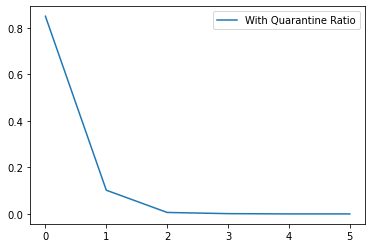

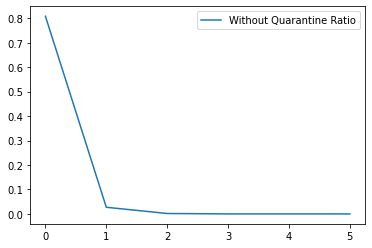

In [21]:
df["Without Quarantine Ratio"] = df["Without Quarantine Coverage"].apply(lambda x: x/14077)
df["With Quarantine Ratio"] = df["With Quarantine Coverage"].apply(lambda x: x/41048)
df.plot(y = "With Quarantine Ratio")
df.plot(y = "Without Quarantine Ratio")

   V1_q Ratio  V1_t Ratio
0    0.799040    0.150289
1    0.557491    0.001408
2    0.354745    0.000000
3    0.103289    0.000000
4    0.091149    0.000000
5    0.000000    0.000000


<AxesSubplot:>

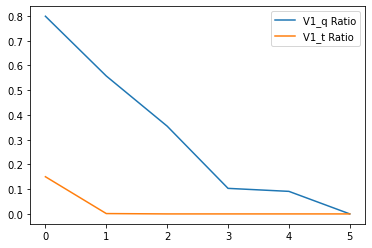

In [31]:
df_sub = df[["V1_q Ratio", "V1_t Ratio"]]
print(df_sub)
df_sub.plot()
#df.plot(y = "V1_q Ratio", "V1_t Ratio")
#df.plot(y = "V1_t Ratio")

<AxesSubplot:>

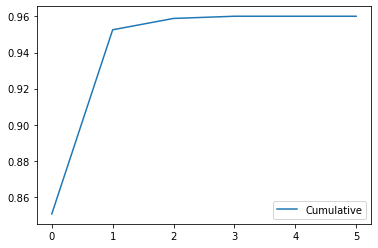

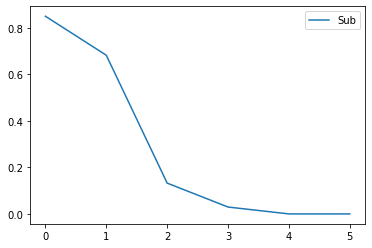

In [39]:
#CUMULATIVE is the total coverage of original V2
#SUB is the coverage of remaining uncovered per timestep

df.loc[0, 'Cumulative'] = df.loc[0, 'With Quarantine Coverage']/41048
df.loc[0, 'Sub'] = df.loc[0, 'With Quarantine Coverage']/41048
cout = 41048
for i in range(1, len(df)):
    df.loc[i, 'Cumulative'] = df.loc[i-1, 'Cumulative'] + df.loc[i, "With Quarantine Coverage"]/(41048)
    cout -= df.loc[i-1, "With Quarantine Coverage"]
    df.loc[i, "Sub"] = df.loc[i, "With Quarantine Coverage"]/( cout)

df.plot(y = "Cumulative")
df.plot(y = "Sub")

<AxesSubplot:>

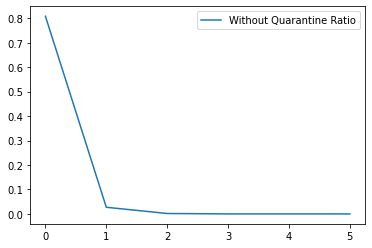

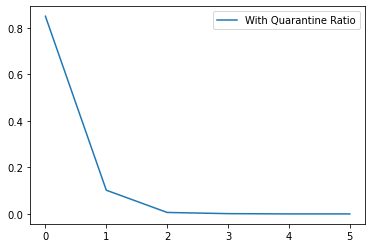

In [32]:
df.plot(y = "Without Quarantine Ratio")
df.plot(y = "With Quarantine Ratio")

In [ ]:
'''for t in range(0, 7):
    print(len(state_t.SIR_known.SIR.I), len(state_t.SIR_real.SIR.I))
    state_t.step(set())'''

In [260]:
print(len(V2_r))
V2_r -= V2_k
tree_timestep = {}
tree_timestep[1] = len(V2_k.intersection(V2_r))
for t in range(1, 10):
    to_quarantine = DepRound(state_t)
    state_t.step(to_quarantine)
    V2_kt = state_t.SIR_known.V2
    V2_tintersect = len(V2_r.intersection(V2_k))
    V2_r -= V2_k
    tree_timestep[t] = [V2_tintersect]

print(len(V2_r))

783
783


In [261]:
print(tree_timestep)

{1: [0], 2: [0], 3: [0], 4: [0], 5: [0], 6: [0], 7: [0], 8: [0], 9: [0]}


In [20]:
G = load_graph("montgomery")
I = set()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "t7.json", 'r') as infile:
    
    j = json.load(infile)
    (S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])

    # Make infected_queue a list of sets
    infected_queue = [set(s) for s in infected_queue]
    I = I.union(*infected_queue)
    I = list(I)
    
state = SimulationState(G, (S, I, R), (S, I, R), 2000, 0.078, 1, 0, 0.8, 0.8)

In [21]:
agent = DegGreedy
information_loss_V1 = 0
information_loss_V2 = 0
information_loss_I = 0
while len(state.SIR_real.SIR[1]) != 0:
    to_quarantine = agent(state)
    state.step(to_quarantine)
    
    V1_real = state.SIR_real.V1
    V1_known = state.SIR_known.V1
    V2_real = state.SIR_real.V2
    V2_known = state.SIR_known.V2
    I_real = set(state.SIR_real.SIR.I)
    I_known = set(state.SIR_known.SIR.I)
    
    information_loss_V1 += len(V1_real-V1_known)
    information_loss_V2 += len(V2_real-V2_known)
    information_loss_I += len(I_real-I_known)

print(information_loss_V1, information_loss_V2, information_loss_I)
print(len(set(state.SIR_real.SIR.S) - set(state.SIR_known.SIR.S)))
print(len(set(state.SIR_real.SIR.R) - set(state.SIR_known.SIR.R)))

107200 231438 12624
0
12624


In [ ]:
#INFORMATION LOSS METRIC
#1 Unreachable nodes
#    - S + R (?)
#    - cut edges
#2 Divergence per iteration (summed)
#    - How many drop out of V2 and V1 in find_excluded_contours successively?
#          - Summed over all iterations
#          - Averaged over # of iterations
#    - How they differ from real V2 and V1 in every iteration (summed)
#          - V2_real - V2_known --> how many real that are unknown
#          - V1_real - V1_known
#          - I_real - I_known

#DIVERGENCE FROM REAL
# V1, V2, I
# 0.1: 167755 162232 30147
# 0.7: 133061 224128 16873
# 0.8: 110250 236905 13062
# 0.9: 85265 244965 9806
# 1.0: 0     0      0

In [234]:
df = pd.read_csv(PROJECT_ROOT/"output/run_YmUkc/results.csv")
df = df[['infected_count_real', 'infected_count_known', 'discovery_rate', 'snitch_rate','budget', 'information_loss_V1', 
         'information_loss_V2', 'information_loss_I', 'information_loss_V1_iterative']]
df_graph_low = pd.DataFrame(columns = ['infected_count_real', 'infected_count_known', 'discovery_rate', 'snitch_rate', 'budget', 'information_loss_V1', 
         'information_loss_V2', 'information_loss_I', 'information_loss_V1_iterative'])
df_graph_high = pd.DataFrame(columns = ['infected_count_real', 'infected_count_known', 'discovery_rate', 'snitch_rate', 'budget', 'information_loss_V1', 
         'information_loss_V2', 'information_loss_I', 'information_loss_V1_iterative'])

for t in range(5, 105, 5):
    for j in range(5, 105, 5):
        df_graph_low = pd.concat([df_graph_low, 
                    pd.DataFrame(df[(df['discovery_rate'] == t/100) & (df['snitch_rate']==j/100) &(df['budget']==1000)].mean(axis = 0)).transpose()])
        df_graph_high = pd.concat([df_graph_high, 
                    pd.DataFrame(df[(df['discovery_rate'] == t/100) & (df['snitch_rate']==j/100) &(df['budget']==2000)].mean(axis = 0)).transpose()])
df_graph_low = df_graph_low.round(2)
df_graph_high = df_graph_high.round(2)

<AxesSubplot:xlabel='information_loss_I', ylabel='infected_count_real'>

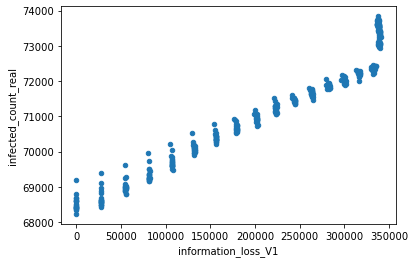

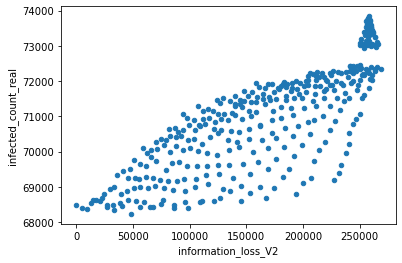

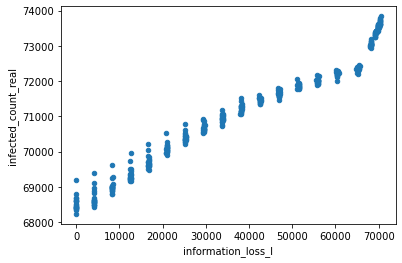

In [250]:
#print(df_graph_low)
df_graph_low.plot.scatter(x = 'information_loss_V1', y='infected_count_real')
#df_graph_high.plot.scatter(x = 'information_loss_V1', y='infected_count_real')
df_graph_low.plot.scatter(x = 'information_loss_V2', y='infected_count_real')
#df_graph_high.plot.scatter(x = 'information_loss_V2', y='infected_count_real')
df_graph_low.plot.scatter(x = 'information_loss_I', y='infected_count_real')
#df_graph_high.plot.scatter(x = 'information_loss_I', y='infected_count_real')

In [238]:
def fun(x, y):
    arr = []
    for i in range(0, len(y)):
        arr.append([])
        for j in range(0, len(x)):
            #print(x[i])
            #print(df_graph_low[(df_graph_low['discovery_rate'] == x[i])])
            #print(x[j], y[i])
            #print((df_graph_low[(df_graph_low['discovery_rate'] == x[i]) & (df_graph_low['snitch_rate'] == y[j])].at[0,'infected_count_real']))
            item = df_graph_low[(df_graph_low['discovery_rate'] == x[j]) & (df_graph_low['snitch_rate'] == y[i])].at[0,'infected_count_real']
            arr[i].append(item)
            #print(arr[i])
    return arr

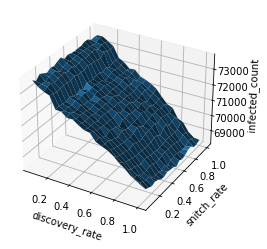

In [239]:


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.round(np.arange(0.05, 1.05, 0.05), decimals = 2)
X, Y = np.meshgrid(x, y)
Z = np.array(fun(x, y))
           
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('infected_count')
ax.plot_surface(X, Y, Z)
    

plt.show()

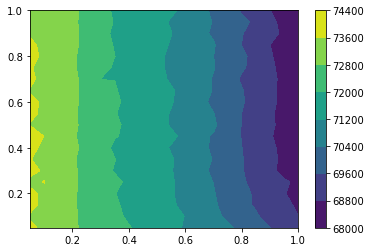

In [179]:
fig,ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
plt.show()

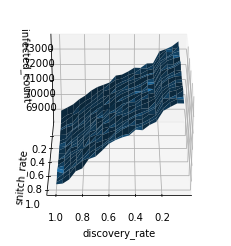

In [160]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('infected_count')
ax.view_init(30, 90)
plt.show()

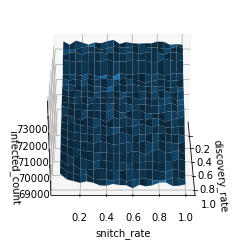

In [162]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('infected_count')
ax.view_init(30, 0)
plt.show()

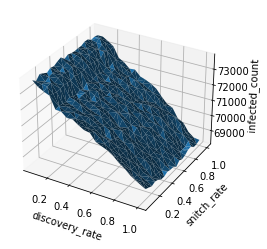

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(df_graph_low.discovery_rate, df_graph_low.snitch_rate, df_graph_low.infected_count_real, linewidth=0.2)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('infected_count')
plt.show()

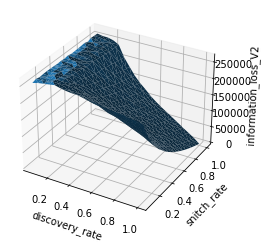

In [134]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(df_graph_low.discovery_rate, df_graph_low.snitch_rate, df_graph_low.information_loss_V2, linewidth=0.2)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('information_loss_V2')
plt.show()

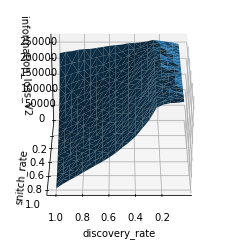

In [163]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(df_graph_low.discovery_rate, df_graph_low.snitch_rate, df_graph_low.information_loss_V2, linewidth=0.2)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('information_loss_V2')
ax.view_init(30, 90)
plt.show()

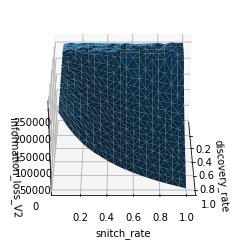

In [165]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(df_graph_low.discovery_rate, df_graph_low.snitch_rate, df_graph_low.information_loss_V2, linewidth=0.2)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('information_loss_V2')
ax.view_init(30, 0)
plt.show()

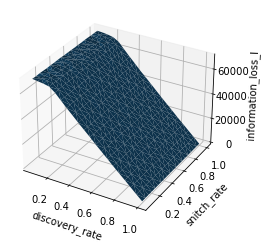

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(df_graph_low.discovery_rate, df_graph_low.snitch_rate, df_graph_low.information_loss_I, linewidth=0.2)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('information_loss_I')
plt.show()

In [240]:
def fun_I(x, y):
    arr = []
    for i in range(0, len(y)):
        arr.append([])
        for j in range(0, len(x)):
            #print(x[i])
            #print(df_graph_low[(df_graph_low['discovery_rate'] == x[i])])
            #print((df_graph_low[(df_graph_low['discovery_rate'] == x[i]) & (df_graph_low['snitch_rate'] == y[j])].at[0,'infected_count_real']))
            item = df_graph_low[(df_graph_low['discovery_rate'] == x[j]) & (df_graph_low['snitch_rate'] == y[i])].at[0,'information_loss_V2']
            arr[i].append(item)
            #print(arr[i])
    return arr

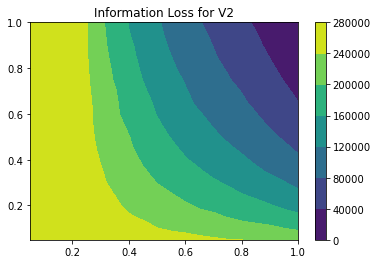

In [247]:
x = y = np.round(np.arange(0.05, 1.05, 0.05), decimals = 2)
X, Y = np.meshgrid(x, y)
Z = np.array(fun_I(x, y))

fig,ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
plt.title("Information Loss for V2")
plt.show()

In [196]:
G = load_graph("montgomery")

I = set()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "z6.json", 'r') as infile:
    
    j = json.load(infile)
    (S, I, R) = (j["S"], j["I"], j["R"])
    early_i = j["early_infected"]
    middle_i = j["middle_infected"]
    late_i = j["late_infected"]
    print(len(set(S).union(set(I)).union(set(R))))
    
state = SimulationState(G, (S, I, R), (S, I, R), 800, (0.10, 0.075, 0.05), (0.04, 0.4, 1.0),0, 1, 0, 1, 1)

75457


In [184]:
print(len(state.SIR_known.V1))
print(len(state.SIR_known.V2))
print(len(state.SIR_known.SIR[1]))

4942
31620
369


In [112]:
G = load_graph("montgomery")
infected_size = 10
G_node = len(G.nodes)
nodeList = list(G.nodes)
I = {nodeList.index(random.randint(0, G_node-1)) for i in range(0, infected_size)}
S = set(G.nodes) - I
state = SimulationState(G, (list(S), list(I), []), (list(S), list(I), []), 700, (0.10, 0.075, 0.05), (0.04, 0.4, 1.0), 0, 1, 0, 1, 1)

In [197]:
'''infections = []
total = []
total = []
early_i = []
middle_i = []
late_i = []
early_t = []
middle_t = []
late_t=[]'''
step = 0
previous_time = True
next_time = True
while(len(state.SIR_real.SIR[1]) != 0):
    
    if(previous_time!=next_time):
        print("Happened")
        state.budget = 500
        #(q0, q1, q2) = (state.SIR_real.quarantined[0], state.SIR_real.quarantined[1], state.SIR_real.quarantined[2])
        #(S, I, R) = (list(set(state.SIR_real.SIR[0]).union(set(q0))), list(set(state.SIR_real.SIR[1]).union(set(q1))), 
                     #list(set(state.SIR_real.SIR[2]).union(set(q2))))
        #state = SimulationState(G, state.SIR_real.SIR, state.SIR_known.SIR, 500, (0.10, 0.075, 0.05), (0.04, 0.4, 1.0), 0, 1, 0, 1, 1)
        #state.SIR_real.quarantined = (q0, q1, q2)
        #state.SIR_known.quarantined = (q0, q1, q2)
        #print(len(set(state.SIR_real.SIR[0]).union(set(state.SIR_real.SIR[1])).union(set(state.SIR_real.SIR[2]))))
    previous_time = next_time
    
    to_quarantine = DegGreedy(state)
    #print(to_quarantine)
    state.step(to_quarantine)
    step+=1
    
    if(state.SIR_real.time_stage == 0):
        next_time = True
        early_i.append(len(state.SIR_real.SIR[1]))
        early_t.append(len(state.SIR_real.SIR[2]))
    elif (state.SIR_real.time_stage == 1):
        next_time = False
        middle_i.append(len(state.SIR_real.SIR[1]))
        middle_t.append(len(state.SIR_real.SIR[2]))
    else:
        next_time = False
        late_i.append(len(state.SIR_real.SIR[1]))
        late_t.append(len(state.SIR_real.SIR[2]))
    infections.append(len(state.SIR_real.SIR[1]))
    total.append(len(state.SIR_real.SIR[2]))
    #print(state.SIR_real.time_stage)
    #if (step >= 6):
    #    to_quarantine = DegGreedy(state)
    #    state.step(to_quarantine)
    #step += 1
    #state.step(set())
infections.append(0)
#late_i.append(len(state.SIR_real.SIR[1]))

Happened


In [96]:
late_i.append(len(state.SIR_real.SIR[1]))
dictD = {}
dictD["S"] = state.SIR_real.SIR[0]
dictD["I"] = state.SIR_real.SIR[1]
dictD["R"] = state.SIR_real.SIR[2]
dictD["early_infected"] = early_i
dictD["middle_infected"] = middle_i
dictD["late_infected"] = late_i
dictD["time_stage"] = state.SIR_real.time_stage
with open(PROJECT_ROOT / "data" / "SIR_Cache"/"z20.json", 'w') as outfile:
    json.dump(dictD, outfile)

In [141]:
print(len(G.nodes))

75457


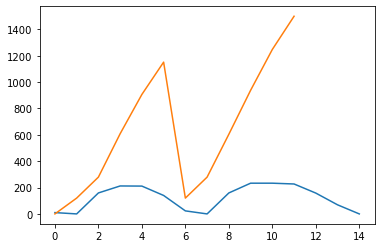

In [111]:
plt.plot(infections)
plt.plot(total)

9 14 0


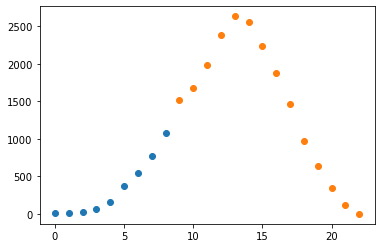

In [195]:
print(len(early_i), len(middle_i), len(late_i))
#print(len([i for i in range(len(early_i)-1, len(middle_i) + len(early_i)-1)]))
plt.scatter([i for i in range(len(early_i))], early_i)
plt.scatter([i for i in range(len(early_i), len(middle_i) + len(early_i))], middle_i)
plt.scatter([i for i in range(len(middle_i) + len(early_i), len(middle_i) + len(early_i) +len(late_i))], late_i)
#print(len(early_i), len(middle_i), len(late_i))
#print((0.10, 0.075, 0.05), (0.10, 0.30, 1.0))

26 1 0


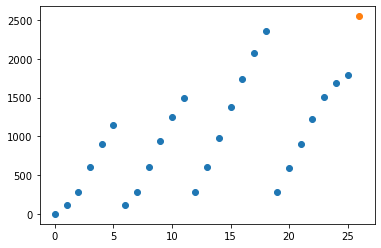

In [118]:
print(len(early_t), len(middle_t), len(late_t))
#print(len([i for i in range(len(early_i)-1, len(middle_i) + len(early_i)-1)]))
plt.scatter([i for i in range(len(early_t))], early_t)
plt.scatter([i for i in range(len(early_t), len(middle_t) + len(early_t))], middle_t)
plt.scatter([i for i in range(len(middle_t) + len(early_t), len(middle_t) + len(early_t) +len(late_t))], late_t)
#print(len(early_i), len(middle_i), len(late_i))
#print((0.10, 0.075, 0.05), (0.10, 0.30, 1.0))

2 3 11


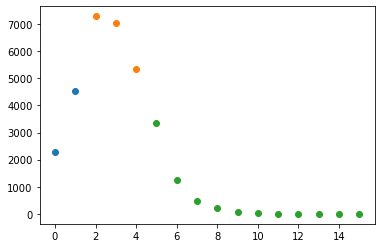

In [130]:
print(len(early_i), len(middle_i), len(late_i))
#print(len([i for i in range(len(early_i)-1, len(middle_i) + len(early_i)-1)]))
plt.scatter([i for i in range(len(early_i))], early_i)
plt.scatter([i for i in range(len(early_i), len(middle_i) + len(early_i))], middle_i)
plt.scatter([i for i in range(len(middle_i) + len(early_i), len(middle_i) + len(early_i) +len(late_i))], late_i)
#print(len(early_i), len(middle_i), len(late_i))


2 3 10
(0.1, 0.075, 0.05) (0.1, 0.35, 1.0)


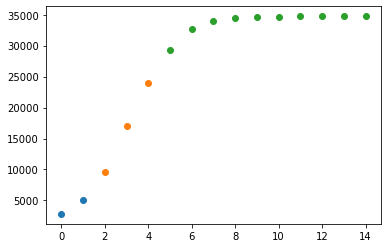

In [131]:
print(len(early_t), len(middle_t), len(late_t))
#print(len([i for i in range(len(early_i)-1, len(middle_i) + len(early_i)-1)]))
plt.scatter([i for i in range(len(early_t))], early_t)
plt.scatter([i for i in range(len(early_t), len(middle_t) + len(early_t))], middle_t)
plt.scatter([i for i in range(len(middle_t) + len(early_t), len(middle_t) + len(early_t) +len(late_t))], late_t)
#print(len(early_i), len(middle_i), len(late_i))
print((0.10, 0.075, 0.05), (0.10, 0.35, 1.0))

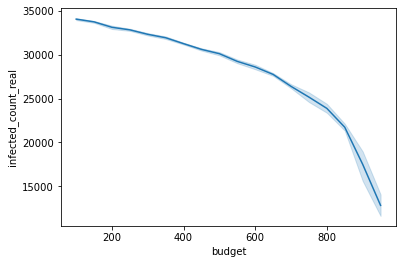

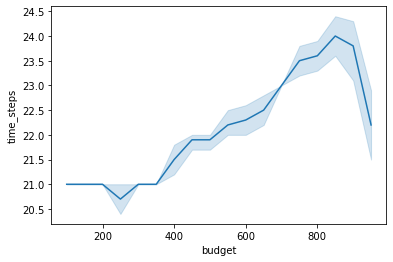

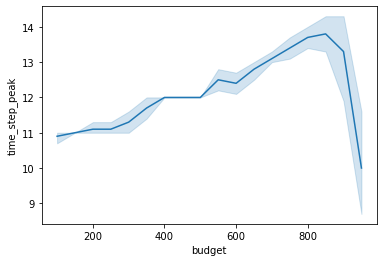

In [215]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_QD46p" / "results.csv")
df1 = pd.read_csv(PROJECT_ROOT / "output" / "run_W6kTG" / "results.csv")
df = pd.concat([df, df1]).reset_index(drop=True)
#print(df["infections_step"][0].strip("[]").split(", "))
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["time_step_max"] = df["infection_list"].apply(lambda x: x.index(max(x)))
import seaborn as sns
sns.lineplot(data=df, x = "budget", y = "infected_count_real")
plt.show()
sns.lineplot(data=df, x = "budget", y ="time_steps" )
plt.show()
sns.lineplot(data=df, x = "budget", y ="time_step_peak")
plt.show()

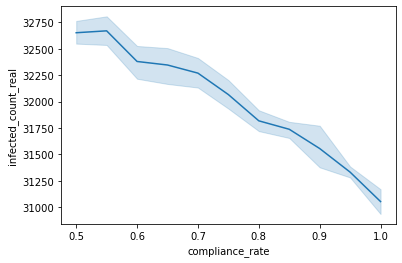

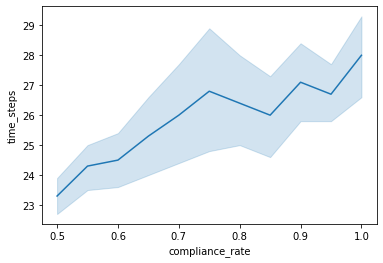

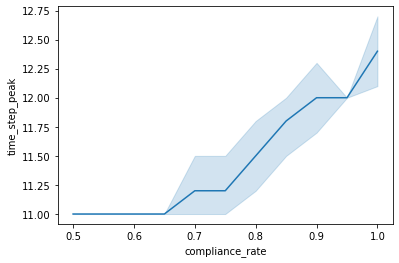

In [216]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_YtbQv" / "results.csv")
#print(df["infections_step"][0].strip("[]").split(", "))
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["time_step_max"] = df["infection_list"].apply(lambda x: x.index(max(x)))
import seaborn as sns
sns.lineplot(data=df, x = "compliance_rate", y = "infected_count_real")
plt.show()
sns.lineplot(data=df, x = "compliance_rate", y ="time_steps" )
plt.show()
sns.lineplot(data=df, x = "compliance_rate", y ="time_step_peak")
plt.show()

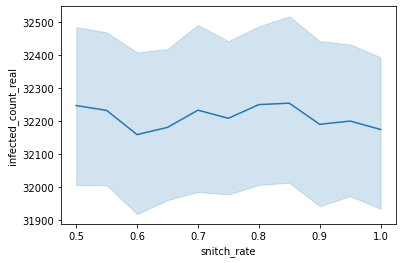

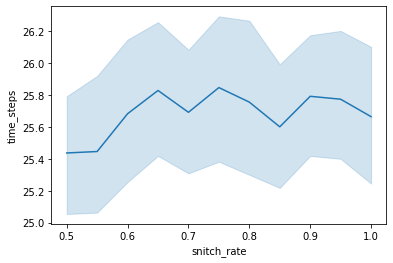

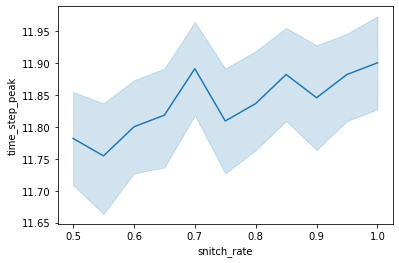

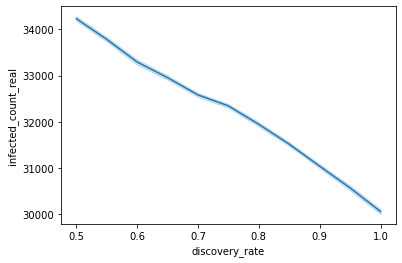

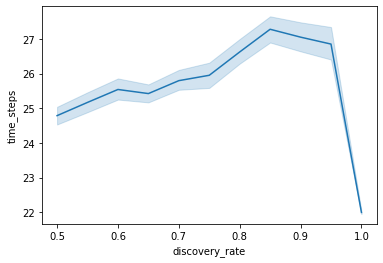

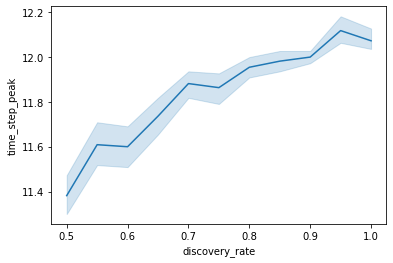

In [220]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_5XhEG" / "results.csv")
#print(df["infections_step"][0].strip("[]").split(", "))
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["time_step_max"] = df["infection_list"].apply(lambda x: x.index(max(x)))
import seaborn as sns
sns.lineplot(data=df, x = "snitch_rate", y = "infected_count_real")
plt.show()
sns.lineplot(data=df, x = "snitch_rate", y ="time_steps" )
plt.show()
sns.lineplot(data=df, x = "snitch_rate", y ="time_step_peak")
plt.show()

sns.lineplot(data=df, x = "discovery_rate", y = "infected_count_real")
plt.show()
sns.lineplot(data=df, x = "discovery_rate", y ="time_steps" )
plt.show()
sns.lineplot(data=df, x = "discovery_rate", y ="time_step_peak")
plt.show()

In [396]:
G = load_graph("montgomery")
infected_size = 10
G_node = len(G.nodes)
nodeList = list(G.nodes)
I = {nodeList.index(random.randint(0, G_node-1)) for i in range(0, infected_size)}
S = set(G.nodes) - I
state = SimulationState(G, (list(S), list(I), []), (list(S), list(I), []), 500, (0.10, 0.075, 0.05), (0.04, 0.10, 1.0), 0, 1, 0, 1, 1)
#state = SimulationState(G, (list(S), list(I), []), (list(S), list(I), []), 500, (0.10, 0.075, 0.05), (1.2, 0.2, 0), 0, 1, 0, 1, 1)

In [397]:
infections = []
total = []
total = []
early_i = []
middle_i = []
late_i = []
early_t = []
middle_t = []
late_t=[]
step = 0
previous_time = True
next_time = True
while(len(state.SIR_real.SIR[1]) != 0):
    
    #if(previous_time!=next_time):
    #    print("Happened")
    #    state.budget = 500
        #(q0, q1, q2) = (state.SIR_real.quarantined[0], state.SIR_real.quarantined[1], state.SIR_real.quarantined[2])
        #(S, I, R) = (list(set(state.SIR_real.SIR[0]).union(set(q0))), list(set(state.SIR_real.SIR[1]).union(set(q1))), 
                     #list(set(state.SIR_real.SIR[2]).union(set(q2))))
        #state = SimulationState(G, state.SIR_real.SIR, state.SIR_known.SIR, 500, (0.10, 0.075, 0.05), (0.04, 0.4, 1.0), 0, 1, 0, 1, 1)
        #state.SIR_real.quarantined = (q0, q1, q2)
        #state.SIR_known.quarantined = (q0, q1, q2)
        #print(len(set(state.SIR_real.SIR[0]).union(set(state.SIR_real.SIR[1])).union(set(state.SIR_real.SIR[2]))))
    #previous_time = next_time
    
    print("AT TIME STAGE:" + str(state.SIR_real.time_stage))
    if (step > 5):
        to_quarantine = DegGreedy(state)
        #print(to_quarantine)
        state.step(to_quarantine)
    else:
        state.step(set())   
    step+=1
    
    if(state.SIR_real.time_stage == 0):
        next_time = True
        early_i.append(len(state.SIR_real.SIR[1]))
        early_t.append(len(state.SIR_real.SIR[2]))
    elif (state.SIR_real.time_stage == 1):
        next_time = False
        middle_i.append(len(state.SIR_real.SIR[1]))
        middle_t.append(len(state.SIR_real.SIR[2]))
    else:
        next_time = False
        late_i.append(len(state.SIR_real.SIR[1]))
        late_t.append(len(state.SIR_real.SIR[2]))
    infections.append(len(state.SIR_real.SIR[1]))
    total.append(len(state.SIR_real.SIR[2]))
    #print(state.SIR_real.time_stage)
    #if (step >= 6):
    #    to_quarantine = DegGreedy(state)
    #    state.step(to_quarantine)
    #step += 1
    #state.step(set())
infections.append(0)
#late_i.append(len(state.SIR_real.SIR[1]))

AT TIME STAGE:0
AT TIME STAGE:0
AT TIME STAGE:0
AT TIME STAGE:0
AT TIME STAGE:0
AT TIME STAGE:0
AT TIME STAGE:0
AT TIME STAGE:0
AT TIME STAGE:0
AT TIME STAGE:1
AT TIME STAGE:1
AT TIME STAGE:1
AT TIME STAGE:1
AT TIME STAGE:1
AT TIME STAGE:1
AT TIME STAGE:1
AT TIME STAGE:2
AT TIME STAGE:2
AT TIME STAGE:2
AT TIME STAGE:2


8 7 5


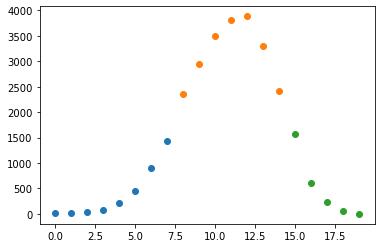

In [398]:
print(len(early_i), len(middle_i), len(late_i))
#print(len([i for i in range(len(early_i)-1, len(middle_i) + len(early_i)-1)]))
plt.scatter([i for i in range(len(early_i))], early_i)
plt.scatter([i for i in range(len(early_i), len(middle_i) + len(early_i))], middle_i)
plt.scatter([i for i in range(len(middle_i) + len(early_i), len(middle_i) + len(early_i) +len(late_i))], late_i)
#print(len(early_i), len(middle_i), len(late_i))


8 7 5
(0.1, 0.075, 0.05) (0.1, 0.35, 1.0)


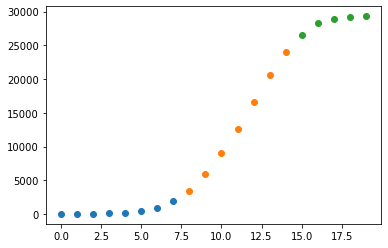

In [399]:
print(len(early_t), len(middle_t), len(late_t))
#print(len([i for i in range(len(early_i)-1, len(middle_i) + len(early_i)-1)]))
plt.scatter([i for i in range(len(early_t))], early_t)
plt.scatter([i for i in range(len(early_t), len(middle_t) + len(early_t))], middle_t)
plt.scatter([i for i in range(len(middle_t) + len(early_t), len(middle_t) + len(early_t) +len(late_t))], late_t)
#print(len(early_i), len(middle_i), len(late_i))
print((0.10, 0.075, 0.05), (0.10, 0.35, 1.0))

In [5]:
G = load_graph_hid_duration()
#print(np.mean(list(nx.get_edge_attributes(G, "duration").values())))
I1 = set(random.randint(0, len(G.nodes)-1) for i in range (0, 10))
S = set(G.nodes)-I1
#state = InfectionState(G, (list(S),list(I1),[],[]), 2000, 0.075, 0.8, True)
#problem2: 85,000 <== 0.075 and 0.8
#problem2: 60,000 <== 0.05 and 1

In [ ]:
state = InfectionState(G, (list(S),list(I1),[],[]), 2000, 0.05, 1, True)
counter = 0
while(len(state.SIR.I1)+len(state.SIR.I2) != 0):
    if counter >= 5:
        quarantine = DepRound(state)
        #print("we quarantine " + str(len(quarantine)))
        state.step(quarantine)
    else:
        state.step(set())
    print(len(state.SIR.R))
    counter+=1

0
10
16
52
159
463
1269
2881


In [3]:
G = load_graph_hid_duration()
#print(np.mean(list(nx.get_edge_attributes(G, "duration").values())))
I1 = set(random.randint(0, len(G.nodes)-1) for i in range (0, 10))
S = set(G.nodes)-I1
state = InfectionState(G, (list(S),list(I1),[],[]), 2000, 0.05)

In [7]:
state = InfectionState(G, (list(S),list(I1),[],[]), 2000, 0.05)
infections = []
infections.append(len(state.SIR.I2))
dictD = {}
dictD["S"] = state.SIR.S
dictD["I1"] = state.SIR.I1
dictD["I2"] = state.SIR.I2
dictD["R"] = state.SIR.R
dictD["infections"] = infections
with open(PROJECT_ROOT / "data" / "SIR_Cache"/"b0.json", 'w') as outfile:
    json.dump(dictD, outfile)
count = 0
while (len(state.SIR.I1)+len(state.SIR.I2) != 0):
    state.step({})
    count+=1
    infections.append(len(state.SIR.I2))
    dictD = {}
    dictD["S"] = state.SIR.S
    dictD["I1"] = state.SIR.I1
    dictD["I2"] = state.SIR.I2
    dictD["R"] = state.SIR.R
    dictD["infections"] = infections
    file_name = "b"+str(count) + ".json"
    with open(PROJECT_ROOT / "data" / "SIR_Cache"/file_name, 'w') as outfile:
        json.dump(dictD, outfile)

In [24]:
G = load_graph_hid_duration()

with open(PROJECT_ROOT / "data" / "SIR_Cache" / "b5.json", 'r') as infile:
            j = json.load(infile)
            
            #(S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]
state = InfectionState(G, (S, I1, I2, R), 2000, 0.05)
while (len(state.SIR.I1)+len(state.SIR.I2) != 0):
    to_quarantine = DegGreedy(state)
    state.step(to_quarantine)
    print(len(state.SIR.I2))

317
986
1187
1645
2155
3393
4831
6300
7564
8118
7430
6083
4494
3003
1778
993
427
166
38
13
2
0


In [6]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_cwthM" / "results.csv")
df2 = pd.read_csv(PROJECT_ROOT / "output" / "run_PUwyi" / "results.csv")
#print(df["infections_step"][0].strip("[]").split(", "))
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
print("DEGREE")
print(df[df["agent"]=="Degree"]["infection_count"].mean(), df[df["agent"]=="Degree2"]["infection_count"].mean())
print("DEGGREEDY")
print(df[df["agent"]=="DegGreedy"]["infection_count"].mean(), df[df["agent"]=="DegGreedy2"]["infection_count"].mean())
print("DEPROUND")
print(df2[df2["agent"]=="DepRound"]["infection_count"].mean(), df[df["agent"]=="DepRound2"]["infection_count"].mean())

DEGREE
64441.6 62866.3
DEGGREEDY
61185.8 61069.4
DEPROUND
60986.8 61155.4


In [7]:
print("DEGREE")
print(df[df["agent"]=="Degree"]["infection_count"].std(), df[df["agent"]=="Degree2"]["infection_count"].std())
print("DEGGREEDY")
print(df[df["agent"]=="DegGreedy"]["infection_count"].std(), df[df["agent"]=="DegGreedy2"]["infection_count"].std())
print("DEPROUND")
print(df2[df2["agent"]=="DepRound"]["infection_count"].std(), df[df["agent"]=="DepRound2"]["infection_count"].std())

DEGREE
259.2524295396713 349.4268481702891
DEGGREEDY
382.0988237499706 347.8017315144426
DEPROUND
364.93554986539135 388.8882158724335


In [ ]:
df = pd.read_csv(PROJECT_ROOT / "output" / "DWkS5" / "results.csv")
import seaborn as sns
sns.lineplot(data=df["DegGreedy2"], x = "budget", y = "infected_count")
plt.show()
sns.lineplot(data=df["DepRound2"], x = "budget", y = "infected_count")
plt.show()

In [4]:
G = load_graph_hid_duration()
for i in range(10):
    print("RUN " + str(i))
    with open(PROJECT_ROOT / "data" / "SIR_Cache" / "b5.json", 'r') as infile:
                j = json.load(infile)

                #(S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])
                (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
                infections = j["infections"]
    state = InfectionState(G, (S, I1, I2, R), 2000, 0.05)
    while (len(state.SIR.I1)+len(state.SIR.I2) != 0):
        to_quarantine = DepRound(state)
        state.step(to_quarantine)
        print(len(state.SIR.I2))
    print(len(state.SIR.R))

RUN 0


KeyboardInterrupt: 

In [10]:
G = nx.Graph()
G.NAME = "cville"
nodes = {}
rev_nodes = []
cnode_to_labels = {}
cnode_to_ages = {}
edges_to_duration = {}
file = open(PROJECT_ROOT / "data/raw/charlottesville.txt", "r")
file.readline()
lines = file.readlines()
c = 0
c_node=0

labels_df = pd.read_csv(PROJECT_ROOT/"data/raw/cville/cville_labels.txt")
labels_df = labels_df[["pid", "hid", "age_group"]]
labels_dict = {}
for index, ids in labels_df.iterrows():
    labels_dict[ids["pid"]] = (ids["hid"], ids["age_group"])

for line in lines:

    a = line.split()
    u = int(a[1])
    v = int(a[2])
    duration = int(a[3])

    if u in nodes.keys():
        u = nodes[u]
    else:
        nodes[u] = c_node
        rev_nodes.append(u)
        cnode_to_labels[c_node] = labels_dict[u][0];
        cnode_to_ages[c_node] = labels_dict[u][1];
        u = c_node
        c_node+=1        

    if v in nodes.keys():
        v = nodes[v]
    else:
        nodes[v] = c_node
        rev_nodes.append(v)
        cnode_to_labels[c_node] = labels_dict[v][0];
        cnode_to_ages[c_node] = labels_dict[v][1];
        v = c_node
        c_node+=1

    G.add_edge(u,v)
    edges_to_duration[(u,v)] = duration

nx.set_node_attributes(G, cnode_to_labels, 'hid')
nx.set_edge_attributes(G, edges_to_duration, 'duration')
nx.set_node_attributes(G, cnode_to_ages, 'age_group')


TypeError: 'function' object is not subscriptable

In [20]:
def Random(state: InfectionState):
    quarantine = set()
    for label in labels:
        V1_label = filter_label(G, state.V1, label)
        quarantine.union(random.sample(V1_label, min(state.budget[label]), len(V1_label)))
    return quarantine
    return set([random.sample(state.V1, min(state.budget[label], len(state.V1))) for label in labels])
def filter_label(G: nx.Graph, to_filter: set, label: int):
    return set(node for node in to_filter if G.nodes[node]["age_group"]==label)
print(filter_label(G, set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]), "a"))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13}


In [32]:
import collections
def filter_label(G: nx.Graph, to_filter: set, label: int):
    return set(node for node in to_filter if G.nodes[node]["age_group"]==label)
def Random_label(state: InfectionState):
    quarantine = set()
    for label in state.labels:
        V1_label = filter_label(state.G, state.V1, label)
        quarantine = quarantine.union(set(random.sample(V1_label, min((state.budget_labels[label]), len(V1_label)))))
    print(len(quarantine))
    print(collections.Counter([state.G.nodes[node]["age_group"] for node in quarantine]))
    return list(quarantine)

G = load_graph_cville_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "b5.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 2000, 0.05)
while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    state.step(Random_label(state))
    print(len(state.SIR.R))

3862
Counter({4: 1718, 0: 997, 3: 476, 2: 413, 1: 258})
199
1050
Counter({4: 503, 0: 249, 3: 142, 2: 97, 1: 59})
516
6233
Counter({0: 2000, 4: 2000, 2: 1009, 3: 655, 1: 569})
1432
3884
Counter({4: 1742, 0: 1135, 2: 465, 3: 348, 1: 194})
2327
7236
Counter({0: 2000, 4: 2000, 2: 1686, 1: 893, 3: 657})
3830
6670
Counter({0: 2000, 4: 2000, 2: 1370, 1: 655, 3: 645})
5277
7748
Counter({0: 2000, 4: 2000, 2: 1956, 1: 1139, 3: 653})
7405
8028
Counter({0: 2000, 2: 2000, 4: 2000, 1: 1182, 3: 846})
9847
8232
Counter({2: 2000, 0: 2000, 4: 2000, 1: 1418, 3: 814})
12416
8350
Counter({4: 2000, 0: 2000, 2: 2000, 1: 1564, 3: 786})
15307
8652
Counter({2: 2000, 0: 2000, 4: 2000, 1: 1754, 3: 898})
18305
8471
Counter({0: 2000, 2: 2000, 4: 2000, 1: 1718, 3: 753})
21273
8244
Counter({0: 2000, 2: 2000, 4: 2000, 1: 1589, 3: 655})
24039
7581
Counter({0: 2000, 2: 2000, 4: 1546, 1: 1536, 3: 499})
26373
6636
Counter({2: 2000, 0: 2000, 1: 1325, 4: 924, 3: 387})
28205
5642
Counter({0: 2000, 2: 1586, 1: 1066, 4: 705, 3

In [38]:
import collections
def filter_label_greedy(G: nx.Graph, to_filter: List[Tuple[int, int]], label: int):
    return [tup for tup in to_filter if G.nodes[tup[1]]["age_group"]==label]

def DegGreedy2_label(state: InfectionState):
    P, Q = pq_independent_edges(state.G, state.SIR.I2, state.V1, state.V2)
    
    weights: List[Tuple[int, int]] = []
    for u in state.V1:
        w_sum = sum([Q[u][v]*(1-P[v]) for v in state.G.neighbors(u) if v in state.V2]) # V2 is a set!
        weights.append((P[u] * (w_sum), u))
    
    quarantine = set()
    weights.sort(reverse=True)
    for label in state.labels:
        deg = filter_label_greedy(state.G, weights, label)
        quarantine = quarantine.union({i[1] for i in deg[:min(state.budget_labels[label], len(deg))]})
    print(len(quarantine))
    print(collections.Counter([state.G.nodes[node]["age_group"] for node in quarantine]))
    return quarantine

G = load_graph_cville_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "b5.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 2000, 0.05)
while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    state.step(DegGreedy2_label(state))
    print(len(state.SIR.R))

3862
Counter({4: 1718, 0: 997, 3: 476, 2: 413, 1: 258})
199
1050
Counter({4: 503, 0: 249, 3: 142, 2: 97, 1: 59})
516
6391
Counter({0: 2000, 4: 2000, 2: 1146, 3: 668, 1: 577})
1434
2855
Counter({4: 1181, 0: 928, 2: 343, 3: 218, 1: 185})
2376
7686
Counter({4: 2000, 0: 2000, 2: 1946, 1: 958, 3: 782})
3983
5909
Counter({0: 2000, 4: 2000, 2: 923, 1: 496, 3: 490})
5315
7572
Counter({0: 2000, 4: 2000, 2: 1848, 1: 1033, 3: 691})
7626
6671
Counter({4: 2000, 0: 2000, 2: 1327, 1: 761, 3: 583})
9511
7497
Counter({0: 2000, 4: 2000, 2: 1884, 1: 994, 3: 619})
11567
6276
Counter({0: 2000, 4: 2000, 2: 1158, 1: 666, 3: 452})
13260
6767
Counter({0: 2000, 4: 1959, 2: 1508, 1: 827, 3: 473})
14867
4878
Counter({0: 2000, 4: 1192, 2: 913, 1: 518, 3: 255})
16138
4760
Counter({0: 2000, 4: 1146, 2: 857, 1: 477, 3: 280})
17180
2907
Counter({0: 1146, 4: 703, 2: 554, 1: 306, 3: 198})
17851
3278
Counter({0: 1404, 4: 773, 2: 624, 1: 303, 3: 174})
18457
1881
Counter({0: 767, 4: 532, 2: 301, 1: 152, 3: 129})
18904
3452

In [64]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [62]:
from ctrace.problem_label import *
def filter_label_dep(G: nx.Graph, to_filter: list, label: int):
    return [to_filter[i] if G.nodes[i]["age_group"]==label else 0 for i in range(len(to_filter))]
def DepRound2_label(state: InfectionState):
    problem2 = MinExposedLP2_label(state)
    problem2.solve_lp()
    probabilities = problem2.get_variables()
    rounded = np.array([0 for i in range(len(probabilities))])
    for label in state.labels:
        partial_prob = [probabilities[k] if state.G.nodes[problem2.quarantine_map[k]]["age_group"]==label else 0 for k in range(len(probabilities))]
        print(sum((np.array(partial_prob))))
        rounded = rounded + D_prime(np.array(partial_prob))
    quarantine = [problem2.quarantine_map[k] for (k,v) in enumerate(rounded) if v==1]
    print(len(quarantine))
    print(collections.Counter([state.G.nodes[node]["age_group"] for node in quarantine]))
    return set([problem2.quarantine_map[k] for (k,v) in enumerate(rounded) if v==1])

G = load_graph_cville_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "b5.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 2000, 0.05)
while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    state.step(DepRound2_label(state))
    print(len(state.SIR.R))

997.0
258.0
411.0
476.0
1718.0
3860
Counter({4: 1718, 0: 997, 3: 476, 2: 411, 1: 258})
199
249.0
58.0
97.0
142.0
503.0
1049
Counter({4: 503, 0: 249, 3: 142, 2: 97, 1: 58})
516
1999.9999999999773
515.0
983.0
696.0
1999.9999999999993
6194
Counter({0: 2000, 4: 2000, 2: 983, 3: 696, 1: 515})
1473
922.0
181.0
352.0
260.0
1502.0
3217
Counter({4: 1502, 0: 922, 2: 352, 3: 260, 1: 181})
2421
1999.9999999999284
1064.0
1956.0
779.0
1999.9999999999923
7799
Counter({0: 2000, 4: 2000, 2: 1956, 1: 1064, 3: 779})
4051
2000.0000000000257
514.0
960.0
453.0
1999.9999999999916
5927
Counter({0: 2000, 4: 2000, 2: 960, 1: 514, 3: 453})
5479
2000.0000000000093
1094.0
1930.5074729794374
780.0
2000.0000000000068
7805
Counter({4: 2000, 0: 2000, 2: 1931, 1: 1094, 3: 780})
7713
1999.9999999999993
838.0
1634.0
634.0
1999.9999999999923
7106
Counter({0: 2000, 4: 2000, 2: 1634, 1: 838, 3: 634})
9864
1999.9999999999957
1183.0
1937.753241702699
655.0
1999.9999999999964
7776
Counter({0: 2000, 4: 2000, 2: 1938, 1: 1183, 3

In [66]:
G = load_graph_cville_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "b5.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 2000, 0.05)
while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    state.step(Random_label(state))
    print(len(state.SIR.R))

199
516
1445
2363
4024
5949
8543
11337
14371
17748
21060
24102
26740
28887
30416
31514
32280
32773
33068
33256
33340
33404
33437
33457
33477
33491
33496
33499
33504
33510
33511
33513
33514


In [67]:
G = load_graph_cville_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "b5.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 2000, 0.05)
while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    state.step(DegGreedy2_label(state))
    print(len(state.SIR.R))

199
516
1461
2402
4017
5302
7543
9406
11588
13332
14978
16202
17214
17969
18580
19081
19515
19958
20326
20727
21043
21348
21607
21884
22134
22365
22614
22850
23034
23198
23300
23415
23503
23655
23740
23875
23939
24053
24101
24178
24215
24259
24284
24329
24345
24375
24388
24411
24420
24441
24443
24448
24454
24466
24469
24474
24477
24483


In [68]:
G = load_graph_cville_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "b5.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 2000, 0.05)
while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    state.step(DepRound2_label(state))
    print(len(state.SIR.R))

199
516
1455
2441
4181
5788
8268
10562
12800
14744
16550
17924
19023
19774
20278
20708
21064
21357
21622
21854
22054
22257
22446
22645
22777
22915
23035
23129
23210
23272
23334
23374
23429
23468
23525
23558
23605
23624
23651
23659
23685
23692
23709
23718
23737
23745
23769
23780
23798
23807
23823
23830
23841
23852
23864
23871
23877
23881
23886
23888
23893
23894
23896
23898
23902
23904
23909
23911
23914


In [79]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [83]:
from ctrace.utils import *
G = load_graph_montgomery_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 2000, 0.05)
while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    state.step(Random_label(state))
    print(len(state.SIR.R))

341
610
1099
1316
1637
1781
1960
2024
2143
2182
2254
2288
2369
2404
2492
2521
2575
2588
2615
2627
2651
2659
2675
2684
2699
2705
2721
2729
2745
2749
2755
2758
2768
2777
2794
2802
2812
2814
2817
2820
2822
2822
2823


In [84]:
from ctrace.utils import *
G = load_graph_montgomery_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 2000, 0.05)
while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    state.step(DegGreedy2_label(state))
    print(len(state.SIR.R))

341
610
1078
1299
1695
1806
2023
2110
2229
2279
2329
2378
2425
2466
2498
2520
2554
2562
2573
2585
2605
2607
2611
2611
2612


In [85]:
from ctrace.utils import *
G = load_graph_montgomery_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 2000, 0.05)
while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    state.step(DepRound2_label(state))
    print(len(state.SIR.R))

341
610
1090
1332
1702
1850
2084
2169
2294
2329
2383
2402
2414
2420
2423


In [98]:
from ctrace.utils import *

G = load_graph_montgomery_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 2000, 0.05)
while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    state.step(DegGreedy2_label(state))
    print(len(state.SIR.R))


341
610
1110
1374
1666
1849
2026
2182
2394
2543
2679
2784
2898
2964
3018
3053
3101
3133
3182
3194
3222
3243
3270
3275
3285


In [25]:
from ctrace.utils import *

G = load_graph_montgomery_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]
            
state = InfectionState(G, (S, I1, I2, R), 1000, "none", 0.05, 0.8, True)
while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    state.step(DegGreedy2_comp(state))
    print(len(state.SIR.R))

341
610
1077
1585
2220
3082
4185
5727
7577
10031
12948
16273
19697
22974
25882
28177
29936
31186
31984
32445
32729
32874
32964
33009
33048
33069
33081
33089
33092
33093


In [27]:
from ctrace.utils import *

G = load_graph_montgomery_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 2000, "none", 0.05, 0.8, True)
while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    state.step(DepRound2_comp(state))
    print(len(state.SIR.R))

hi i know compliance
341
hi i know compliance
610
hi i know compliance
1061
hi i know compliance
1477
hi i know compliance
2016
hi i know compliance
2633
hi i know compliance
3446
hi i know compliance
4339
hi i know compliance
5397
hi i know compliance
6566
hi i know compliance
7940
hi i know compliance
9489
hi i know compliance
11205
hi i know compliance
13000
hi i know compliance
14870
hi i know compliance
16718
hi i know compliance
18443
hi i know compliance
20028
hi i know compliance
21355
hi i know compliance
22405
hi i know compliance
23203
hi i know compliance
23785
hi i know compliance
24212
hi i know compliance
24509
hi i know compliance
24701
hi i know compliance
24854
hi i know compliance
24943
hi i know compliance
25015
hi i know compliance
25065
hi i know compliance
25091
hi i know compliance
25104
hi i know compliance
25112
hi i know compliance
25116
hi i know compliance
25118


In [ ]:
def read_extra_edges(G_o: nx.Graph, alpha):
    G = copy.deepcopy(G_o)
    
    nx.set_edge_attributes(G, {e:False for e in G.edges()}, "added")
    
    if G.NAME == "montgomery":
        filename = "montgomery_extra_edges_label_" + str(alpha) + ".txt"
        directory_path = PROJECT_ROOT / "data"/"graphs"/"montgomery"/filename
        if not path.exists(directory_path):
            store_extra_edges(G_o, alpha)
        infile = open(directory_path, "r")
    else:
        filename = "cville_extra_edges_label_" + str(alpha) + ".txt"
        directory_path = PROJECT_ROOT / "data"/"raw"/"cville"/filename
        if not path.exists(directory_path):
            store_extra_edges(G_o, alpha)
        infile = open(directory_path, "r")
    
    lines = infile.readlines()
    for line in lines:
        a = line.split(",")
        u = int(a[0])
        v = int(a[1])
        duration = int(a[2])
        age_group = int(a[3])
        G.add_edge(u, v)
        G[u][v]['duration'] = duration
        G[u][v]['age_group'] = age_group
        G[u][v]['added'] = True
    
    return G;

def store_extra_edges(G, alpha):
    
    if G.NAME == "montgomery":
        filename = "montgomery_extra_edges" + "_" + str(alpha) + ".txt"
        outfile = open(PROJECT_ROOT / "data"/"graphs"/"montgomery"/filename, "w")
    else:
        filename = "cville_extra_edges" + "_" + str(alpha) + ".txt"
        outfile = open(PROJECT_ROOT / "data"/"raw"/"cville"/filename, "w")
    
    file = open(PROJECT_ROOT / "data/raw/charlottesville.txt", "r")
    file.readline()
    lines = file.readlines()
    
    durations = []
    ages = []
    taken_edges = {}
    node_list = [i for i in range(0,len(G.nodes))]
    
    for line in lines:
        a = line.split()
        duration = int(a[3])
        durations.append(duration)
    
    labels_df = pd.read_csv(PROJECT_ROOT/"data/raw/cville/cville_labels.txt")
    labels_df = labels_df["age_group"]
    labels_array = []
    map_label = {"a": 0, "g":1, "o":2, "p":3, "s":4}
    for index, ids in labels_df.items():
        labels_array.append(map_label[ids])
    
    for node in G.nodes:
        if node not in taken_edges:
            taken_edges[node] = set()
        ngbrs = set(G.neighbors(node))
        for i in range(max(0, int((alpha)*len(ngbrs))-len(taken_edges[node]))):
            e = node_list[random.randint(0, len(G.nodes)-1)]
            while e in (ngbrs|taken_edges[node]|{node}):
                e = node_list[random.randint(0, len(G.nodes)-1)]
            
            if e in taken_edges:
                taken_edges[e].add(node)
            else:
                taken_edges[e] = {node}
            
            duration = durations[random.randint(0, len(durations)-1)]
            age_group_ind = labels_array[random.randint(0, len(age_group_ind)-1)]
            outfile.write(str(node) + "," + str(e)+ "," + str(duration) +"\n")

In [23]:
def store_graph_montgomery_labels():
    G = nx.Graph()
    G.NAME = "montgomery"
    
    file = open(PROJECT_ROOT / "data/raw/charlottesville.txt", "r")
    file.readline()
    lines = file.readlines()
    durations = []
    for line in lines:
        a = line.split()
        duration = int(a[3])
        durations.append(duration)
    
    labels_df = pd.read_csv(PROJECT_ROOT/"data/raw/cville/cville_labels.txt")
    labels_df = labels_df["age_group"]
    labels_array = []
    map_label = {"a": 0, "g":1, "o":2, "p":3, "s":4}
    compliance_map = [.6, .8, .85, .75, .8]
    
    for index, ids in labels_df.items():
        labels_array.append(map_label[ids])
    
    file = open(PROJECT_ROOT / "data/graphs/montgomery/montgomery.csv", "r")
    lines = file.readlines()
    nodes = {}
    rev_nodes = []
    edges_to_duration = {}
    cnode_to_labels = {}
    compliances = {}
    c_node=0
    
    outfile = open(PROJECT_ROOT / "data/graphs/montgomery/montgomery_labels_all.txt", "w")
    
    for line in lines:
        a = line.split(",")
        u = int(a[0])
        v = int(a[1])
        duration = durations[random.randint(0, len(durations)-1)]
        
        if u not in cnode_to_labels:
            age_label_u = labels_array[random.randint(0, len(labels_array)-1)]
            compliance_u = compliance_map[age_label_u] + random.uniform(-0.05, 0.05)
            cnode_to_labels[u] = age_label_u
            compliances[u] = compliance_u
        if v not in cnode_to_labels:
            age_label_v = labels_array[random.randint(0, len(labels_array)-1)]
            cnode_to_labels[v] = age_label_v
            compliance_v = compliance_map[age_label_v] + random.uniform(-0.05, 0.05)
            compliances[v] = compliance_v
        
        outfile.write(str(u) + "," + str(v)+ "," + str(duration) + "," + str(cnode_to_labels[u])+"," + str(cnode_to_labels[v])+ "," + str(compliances[u])+"," + str(compliances[v])+"\n")
        
store_graph_montgomery_labels()

{0: 3, 1: 1, 2: 0, 3: 0, 4: 0, 5: 4, 6: 1, 7: 0, 8: 2, 9: 1, 10: 2, 11: 0, 12: 0, 13: 1, 14: 4, 15: 3, 16: 2, 17: 0, 18: 1, 19: 0, 20: 4, 21: 1, 22: 2, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 0, 29: 0, 30: 3, 31: 0, 32: 0, 33: 0, 34: 1, 35: 0, 36: 4, 37: 4, 38: 0, 39: 2, 40: 2, 41: 0, 42: 0, 43: 2, 44: 0, 45: 0, 46: 2, 47: 1, 48: 0, 49: 0, 50: 0, 51: 0, 52: 2, 53: 0, 54: 1, 55: 4, 56: 4, 57: 2, 58: 0, 59: 0, 60: 0, 61: 2, 62: 0, 63: 0, 64: 1, 65: 1, 66: 0, 67: 2, 68: 2, 69: 0, 70: 4, 71: 0, 72: 1, 73: 1, 74: 2, 75: 1, 76: 3, 77: 4, 78: 2, 79: 4, 80: 0, 81: 4, 82: 0, 83: 0, 84: 2, 85: 1, 86: 4, 87: 2, 88: 4, 89: 0, 90: 2, 91: 0, 92: 4, 93: 0, 94: 0, 95: 0, 96: 1, 97: 3, 98: 2, 99: 1, 100: 0, 101: 4, 102: 0, 103: 0, 104: 2, 105: 1, 106: 0, 107: 2, 108: 4, 109: 3, 110: 3, 111: 4, 112: 0, 113: 1, 114: 1, 115: 0, 116: 2, 117: 2, 118: 0, 119: 0, 120: 4, 121: 0, 122: 4, 123: 2, 124: 2, 125: 0, 126: 0, 127: 2, 128: 2, 129: 4, 130: 0, 131: 3, 132: 0, 133: 0, 134: 3, 135: 0, 136: 0, 137: 0, 138: 

(array([32519.,     0., 12102.,     0.,     0., 15633.,     0.,  3967.,
            0., 11236.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

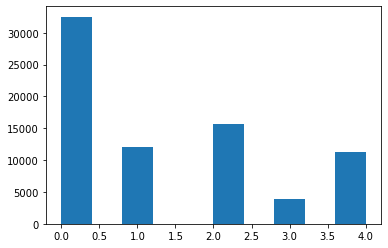

In [13]:
def load_graph_montgomery_labels2():
    G = nx.Graph()
    G.NAME = "montgomery"
    
    file = open(PROJECT_ROOT / "data/graphs/montgomery/montgomery_labels.txt", "r")
    lines = file.readlines()
    nodes = {}
    rev_nodes = []
    edges_to_duration = {}
    cnode_to_labels = {}
    c_node=0
    
    for line in lines:
        a = line.split(",")
        u = int(a[0])
        v = int(a[1])
        duration = int(a[2])
        age_group_u = int(a[3])
        age_group_v = int(a[4])
        
        if u in nodes.keys():
            u = nodes[u]
        else:
            nodes[u] = c_node
            rev_nodes.append(u)
            u = c_node
            c_node+=1   
    
        if v in nodes.keys():
            v = nodes[v]
        else:
            nodes[v] = c_node
            rev_nodes.append(v)
            v = c_node
            c_node+=1
        
        G.add_edge(u,v)
        edges_to_duration[(u,v)] = duration
        cnode_to_labels[u] = age_group_u
        cnode_to_labels[v] = age_group_v
        
    nx.set_edge_attributes(G, edges_to_duration, 'duration')
    nx.set_node_attributes(G, cnode_to_labels, 'age_group')
    
    return G

G = load_graph_montgomery_labels2()
print(nx.get_node_attributes(G, 'age_group'))
plt.hist(list(nx.get_node_attributes(G, 'age_group').values()))

(array([56751.,     0., 20331.,     0.,     0., 26869.,     0.,  7081.,
            0., 20187.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

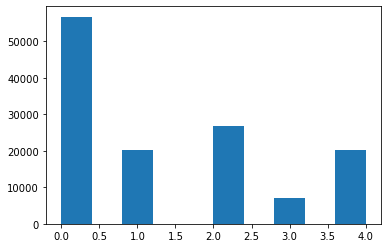

In [14]:
plt.hist(list(nx.get_node_attributes(load_graph_cville_labels(), 'age_group').values()))

(array([7546., 7546., 7545., 7546., 7545., 7546., 7546., 7545., 7546.,
        7546.]),
 array([    0. ,  7545.6, 15091.2, 22636.8, 30182.4, 37728. , 45273.6,
        52819.2, 60364.8, 67910.4, 75456. ]),
 <BarContainer object of 10 artists>)

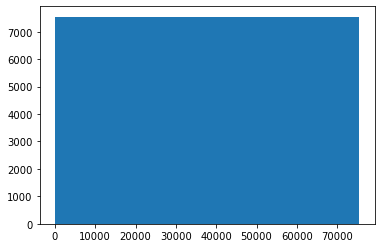

In [3]:
def find_excluded_contours_edges_PQ(G: nx.Graph, infected: Set[int], excluded: Set[int], discovery_rate:float = 1, snitch_rate:float = 1, compliance_known:bool = False):
    P = {}
    Q = {}
    v1_k = set()
    v2_k = set()
    for i in infected:
        for u in effective_neighbor(G, i, G.neighbors(i), compliance_known)-(set(infected) | set(excluded)):
            if random.uniform(0,1) < discovery_rate:
                v1_k.add(u)
                if u in P:
                    P[u] *= 1-(G[i][u]["compliance_transmission"][u][1] if check_edge_transmission(G, i, u, compliance_known) else 0)
                else:
                    P[u] = 1-(G[i][u]["compliance_transmission"][u][1] if check_edge_transmission(G, i, u, compliance_known) else 0)

                for v in set(G.neighbors(u))-(set(infected) | set(excluded)):
                    if (random.uniform(0,1) < snitch_rate):
                        if u in Q:
                            Q[u][v] = G[u][v]["compliance_transmission"][u][1]
                        else:
                            Q[u] = {v: G[u][v]["compliance_transmission"][u][1]}
                        v2_k.add(v)
                    if v not in P:
                        P[v] = 1

    for u in P.keys():
        P[u] = 1-P[u]

    return v1_k, v2_k, P, Q

G = load_graph_montgomery_labels()

I1 = set(random.randint(0, len(G.nodes)-1) for i in range (0, 10))
S = set(G.nodes)-I1

state = InfectionState(G, (list(S), list(I1), [], []), 2000, "none", 0.05, 0.8, True)
state.step({})
plt.hist(nx.get_node_attributes(state.G, "compliance_rate"))

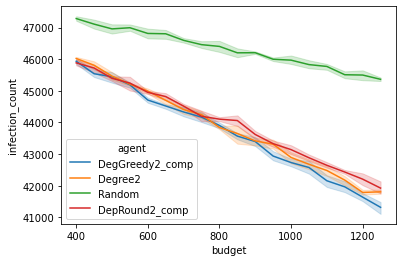

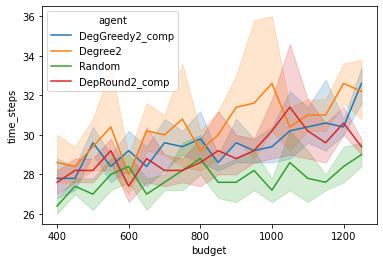

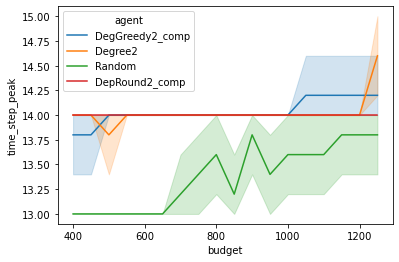

In [7]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_LzdyE" / "results.csv")
#print(df["infections_step"][0].strip("[]").split(", "))
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["time_step_max"] = df["infection_list"].apply(lambda x: x.index(max(x)))
import seaborn as sns
sns.lineplot(data=df, x = "budget", y = "infection_count", hue = "agent")
plt.show()
sns.lineplot(data=df, x = "budget", y ="time_steps", hue = "agent")
plt.show()
sns.lineplot(data=df, x = "budget", y ="time_step_peak", hue = "agent")
plt.show()

In [11]:
from ctrace.utils import *

G = load_graph_montgomery_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "ce6.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 1000, "none", 0.05, 0.8, True)
while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    state.step(DepRound2_comp(state))
    print(len(state.SIR.R))

372
794
1458
2460
3705
5405
7706
10577
13906
17605
21350
24860
27741
29983
31653
32756
33471
33873
34062
34180
34235
34280
34296
34304
34309
34310
34311


In [19]:
from ctrace.utils import *

G = load_graph_montgomery_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "ce6.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 1000, "none", 0.05, 0.8, True, False, 1, 0.8, 0.8)
while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    state.step(DepRound2_comp(state))
    print(len(state.SIR.R))

372
794
1420
2418
3633
5415
7626
10509
13944
17894
21854
25477
28433
30720
32266
33303
33921
34287
34471
34559
34611
34633
34647
34649
34650


In [14]:
def find_excluded_contours_edges_PQ(G: nx.Graph, infected: Set[int], excluded: Set[int], discovery_rate:float = 1, snitch_rate:float = 1, compliance_edge_known:bool = False):
    v1 = set().union(*[effective_neighbor(G, v, G.neighbors(v), compliance_edge_known) for v in set(infected)]) - (set(infected) | set(excluded))
    v1_k = {v for v in v1 if random.uniform(0,1) < discovery_rate}
    P = {v: (1 - math.prod(1-(G[i][v]["compliance_transmission"][i][1] if check_edge_transmission(G, i, v, compliance_edge_known) else 0) for i in set(set(G.neighbors(v)) & set(infected)))) for v in v1_k}

    v2_k = set()
    Q = {}
    for u in v1_k:
        for v in set(G.neighbors(u))-(set(infected) | set(excluded)):
            if check_edge_transmission(G, u, v, compliance_edge_known):
                if (random.uniform(0,1) < snitch_rate):
                    if u in Q:
                        Q[u][v] = G[u][v]["compliance_transmission"][u][1]
                    else:
                        Q[u] = {v: G[u][v]["compliance_transmission"][u][1]}
                    v2_k.add(v)
            if v not in P:
                P[v] = 0
    
    return v1_k, v2_k, P, Q

G = load_graph_montgomery_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "ce6.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 1000, "none", 0.05, 0.8, True, False, 1, 0.8, 0.8)
v1_k, v2_k, P, Q = state.V1, state.V2, state.P, state.Q
print(len(v1_k), len(v2_k), len(P.keys()), len(Q.keys()))

2940 23648 26953 2929


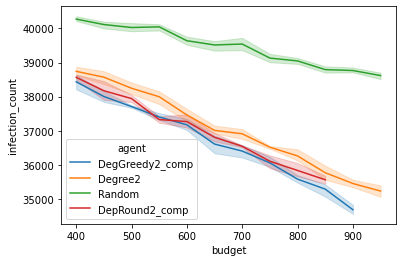

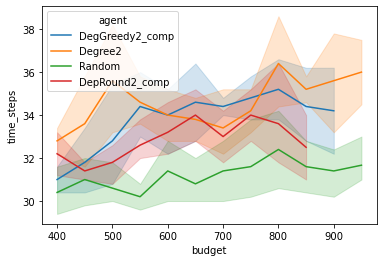

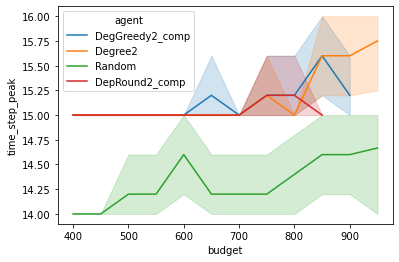

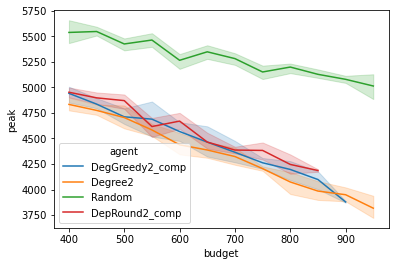

In [22]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_9qvcJ" / "results.csv")
#print(df["infections_step"][0].strip("[]").split(", "))
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak"] = df["infection_list"].apply(lambda x: max(x))
import seaborn as sns
sns.lineplot(data=df, x = "budget", y = "infection_count", hue = "agent")
plt.show()
sns.lineplot(data=df, x = "budget", y ="time_steps", hue = "agent")
plt.show()
sns.lineplot(data=df, x = "budget", y ="time_step_peak", hue = "agent")
plt.show()
sns.lineplot(data=df, x = "budget", y ="peak", hue = "agent")
plt.show()

(array([11401., 11304.,  9696.,     0.,   938.,  3819.,  9758., 12954.,
        10096.,  5491.]),
 array([0.55000022, 0.58500007, 0.61999992, 0.65499976, 0.68999961,
        0.72499946, 0.75999931, 0.79499916, 0.829999  , 0.86499885,
        0.8999987 ]),
 <BarContainer object of 10 artists>)

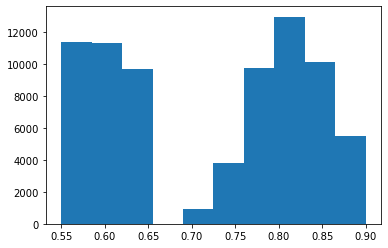

In [25]:
G = nx.Graph()
G.NAME = "montgomery"

file = open(PROJECT_ROOT / "data/graphs/montgomery/montgomery_labels_all.txt", "r")
lines = file.readlines()
nodes = {}
rev_nodes = []
edges_to_duration = {}
cnode_to_labels = {}
cnode_to_comp = {}
c_node=0

for line in lines:
    a = line.split(",")
    u = int(a[0])
    v = int(a[1])
    duration = int(a[2])
    age_group_u = int(a[3])
    age_group_v = int(a[4])
    compliance_u = float(a[5])
    compliance_v = float(a[6])

    if u in nodes.keys():
        u = nodes[u]
    else:
        nodes[u] = c_node
        rev_nodes.append(u)
        u = c_node
        c_node+=1   

    if v in nodes.keys():
        v = nodes[v]
    else:
        nodes[v] = c_node
        rev_nodes.append(v)
        v = c_node
        c_node+=1

    G.add_edge(u,v)
    edges_to_duration[(u,v)] = duration
    cnode_to_labels[u] = age_group_u
    cnode_to_labels[v] = age_group_v
    cnode_to_comp[u] = compliance_u
    cnode_to_comp[v] = compliance_v

nx.set_edge_attributes(G, edges_to_duration, 'duration')
nx.set_node_attributes(G, cnode_to_labels, 'age_group')
nx.set_node_attributes(G, cnode_to_comp, 'compliance_rate')

plt.hist(list(nx.get_node_attributes(G,'compliance_rate').values()))

In [31]:
G = nx.Graph()
G.NAME = "cville"
nodes = {}
rev_nodes = []
cnode_to_labels = {}
cnode_to_ages = {}
edges_to_duration = {}
file = open(PROJECT_ROOT / "data/raw/charlottesville.txt", "r")
file.readline()
lines = file.readlines()
c = 0
c_node=0

outfile = open(PROJECT_ROOT/"data/raw/charlottesville_labels_all.txt", "w")

labels_df = pd.read_csv(PROJECT_ROOT/"data/raw/cville/cville_labels.txt")
labels_df = labels_df[["pid", "hid", "age_group"]]
labels_dict = {}
map_label = {"a": 0, "g":1, "o":2, "p":3, "s":4}
compliances = {}
compliance_map = [.6, .8, .85, .75, .8]

for index, ids in labels_df.iterrows():
    labels_dict[ids["pid"]] = (ids["hid"], ids["age_group"])

for line in lines:

    a = line.split()
    u = int(a[1])
    v = int(a[2])
    duration = int(a[3])
    if u not in compliances:
        cnode_to_labels[u] = map_label[labels_dict[u][1]]
        compliances[u] = compliance_map[map_label[labels_dict[u][1]]] + random.uniform(-0.05, 0.05);
    if v not in compliances:
        cnode_to_labels[v] = map_label[labels_dict[u][1]]
        compliances[v] = compliance_map[map_label[labels_dict[v][1]]] + random.uniform(-0.05, 0.05);

    outfile.write(str(u) + "," + str(v)+ "," + str(duration) + "," + str(cnode_to_labels[u])+"," + str(cnode_to_labels[v])+ "," + str(compliances[u])+"," + str(compliances[v])+"\n")
        
    


In [40]:
def load_graph_cville_labels():
    G = nx.Graph()
    G.NAME = "cville"
    nodes = {}
    rev_nodes = []
    cnode_to_labels = {}
    cnode_to_comp = {}
    edges_to_duration = {}
    file = open(PROJECT_ROOT / "data/raw/charlottesville_labels_all.txt", "r")
    file.readline()
    lines = file.readlines()
    c = 0
    c_node=0

    for line in lines:

        a = line.split(",")
        u = int(a[0])
        v = int(a[1])
        duration = int(a[2])
        age_group_u = int(a[3])
        age_group_v = int(a[4])
        compliance_u = float(a[5])
        compliance_u = float(a[6])

        if u in nodes.keys():
            u = nodes[u]
        else:
            nodes[u] = c_node
            rev_nodes.append(u)
            u = c_node
            c_node+=1        

        if v in nodes.keys():
            v = nodes[v]
        else:
            nodes[v] = c_node
            rev_nodes.append(v)
            v = c_node
            c_node+=1

        G.add_edge(u,v)
        edges_to_duration[(u,v)] = duration
        cnode_to_labels[u] = age_group_u
        cnode_to_labels[v] = age_group_v
        cnode_to_comp[u] = compliance_u
        cnode_to_comp[v] = compliance_v

    nx.set_edge_attributes(G, edges_to_duration, 'duration')
    nx.set_node_attributes(G, cnode_to_labels, 'age_group')
    nx.set_node_attributes(G, cnode_to_comp, 'compliance_rate')
    
    #plt.hist(list(nx.get_node_attributes(G, 'compliance_rate').values()))
    
    return G;
load_graph_cville_labels()

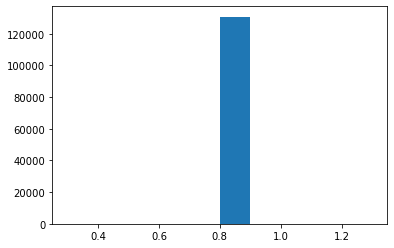

In [41]:
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "b6.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

G = load_graph_cville_labels()
state = InfectionState(G, (S, I1, I2, R), 1000, "none", 0.05, 0.8, False, False, 1, 0.8, 0.8)
plt.hist(list(nx.get_node_attributes(state.G, 'compliance_rate').values()))
plt.show()

In [47]:
G = load_graph_cville_labels()
G = read_extra_edges(G, 0.15)

I1 = set(random.randint(0, len(G.nodes)-1) for i in range (0, 10))
S = set(G.nodes)-I1

state = InfectionState(G, (list(S), list(I1), [], []), 2000, "none", 0.05, 0.8, True)   
infections = []
infections.append(len(state.SIR.I2))

count = 0
while (len(state.SIR.I1)+len(state.SIR.I2) != 0):
    state.step({})
    count+=1
    infections.append(len(state.SIR.I2))
    dictD = {}
    dictD["S"] = state.SIR.S
    dictD["I1"] = state.SIR.I1
    dictD["I2"] = state.SIR.I2
    dictD["R"] = state.SIR.R
    dictD["infections"] = infections
    file_name = "be"+str(count) + ".json"
    with open(PROJECT_ROOT / "data" / "SIR_Cache"/file_name, 'w') as outfile:
        json.dump(dictD, outfile)

KeyboardInterrupt: 

In [51]:
#run_XkskM for mont
#run_8Etcs for cville
G = load_graph_cville_labels()
G = read_extra_edges(G, 0.15)

max_node = 0
for node in G.nodes:
    dist = len(list(G.neighbors(node))) 
    if dist > max_node:
        max_node = dist

print(max_node)

205


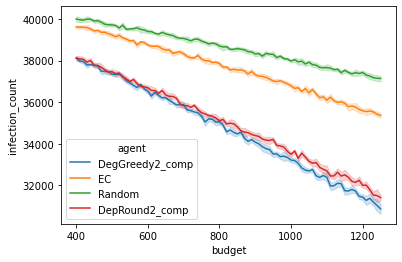

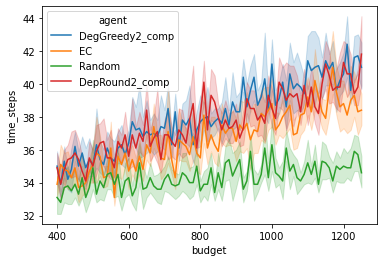

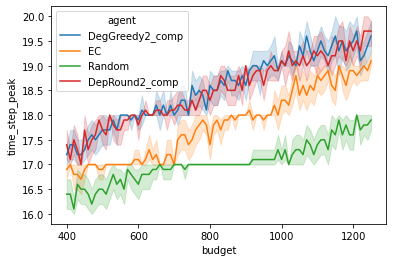

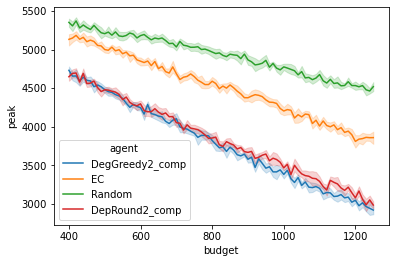

In [6]:
#nk25o for cville w/ edges no intervention

df = pd.read_csv(PROJECT_ROOT / "output" / "run_XkskM" / "results.csv")

df_no = pd.read_csv(PROJECT_ROOT / "output" / "run_nk25o" / "results.csv").mean()
#print(df["infections_step"][0].strip("[]").split(", "))
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak"] = df["infection_list"].apply(lambda x: max(x))
import seaborn as sns
sns.lineplot(data=df, x = "budget", y = "infection_count", hue = "agent")
plt.show()
sns.lineplot(data=df, x = "budget", y ="time_steps", hue = "agent")
plt.show()
sns.lineplot(data=df, x = "budget", y ="time_step_peak", hue = "agent")
plt.show()
sns.lineplot(data=df, x = "budget", y ="peak", hue = "agent")
plt.show()

In [3]:
df_mont = pd.read_csv(PROJECT_ROOT / "output" / "run_XkskM" / "results.csv")
df_cville = pd.read_csv(PROJECT_ROOT / "output" / "run_mdioi" / "results.csv")
df_mont_edges = pd.read_csv(PROJECT_ROOT / "output" / "run_B7UWt" / "results.csv")
df_cville_edges = pd.read_csv(PROJECT_ROOT / "output" / "run_8Etcs" / "results.csv")
df_cville_edges = pd.concat([pd.read_csv(PROJECT_ROOT / "output" / "run_MGy75" / "results.csv"), df_cville_edges[df_cville_edges["budget"]<1800]])

df_mont = df_mont.replace({'Random':'Random Sol', 'EC':'Eigenvector Centrality', 'DepRound2_comp':'DepRound', 'DegGreedy2_comp':'DegGreedy'})
df_cville = df_cville.replace({'Random':'Random Sol', 'EC':'Eigenvector Centrality', 'DepRound2_comp':'DepRound', 'DegGreedy2_comp':'DegGreedy'})
df_mont_edges = df_mont_edges.replace({'Random':'Random Sol', 'EC':'Eigenvector Centrality', 'DepRound2_comp':'DepRound', 'DegGreedy2_comp':'DegGreedy'})
df_cville_edges = df_cville_edges.replace({'Random':'Random Sol', 'EC':'Eigenvector Centrality', 'DepRound2_comp':'DepRound', 'DegGreedy2_comp':'DegGreedy'})

df_mont = df_mont.rename(columns={"agent":"Alg for MinExposed"})
df_cville = df_cville.rename(columns={"agent":"Alg for MinExposed"})
df_mont_edges = df_mont_edges.rename(columns={"agent":"Alg for MinExposed"})
df_cville_edges = df_cville_edges.rename(columns={"agent":"Alg for MinExposed"})

df_mont['infected'] = 100.0*df_mont['infection_count']/75457
df_cville['infected'] = 100.0*df_cville['infection_count']/131219
df_mont_edges['infected'] = 100.0*df_mont_edges['infection_count']/75457
df_cville_edges['infected'] = 100.0*df_cville_edges['infection_count']/131219
 
df_mont = pd.concat([df_mont[df_mont["Alg for MinExposed"] == "Random Sol"], df_mont[df_mont["Alg for MinExposed"] == "Eigenvector Centrality"], 
                     df_mont[df_mont["Alg for MinExposed"] == "DepRound"], df_mont[df_mont["Alg for MinExposed"] == "DegGreedy"]])
df_cville = pd.concat([df_cville[df_cville["Alg for MinExposed"] == "Random Sol"], df_cville[df_cville["Alg for MinExposed"] == "Eigenvector Centrality"], 
                     df_cville[df_cville["Alg for MinExposed"] == "DepRound"], df_cville[df_cville["Alg for MinExposed"] == "DegGreedy"]])
df_mont_edges = pd.concat([df_mont_edges[df_mont_edges["Alg for MinExposed"] == "Random Sol"], df_mont_edges[df_mont_edges["Alg for MinExposed"] == "Eigenvector Centrality"], 
                     df_mont_edges[df_mont_edges["Alg for MinExposed"] == "DepRound"], df_mont_edges[df_mont_edges["Alg for MinExposed"] == "DegGreedy"]])
df_cville_edges = pd.concat([df_cville_edges[df_cville_edges["Alg for MinExposed"] == "Random Sol"], df_cville_edges[df_cville_edges["Alg for MinExposed"] == "Eigenvector Centrality"], 
                     df_cville_edges[df_cville_edges["Alg for MinExposed"] == "DepRound"], df_cville_edges[df_cville_edges["Alg for MinExposed"] == "DegGreedy"]])

#-----------------------------------------------

df_mont_none = pd.read_csv(PROJECT_ROOT / "output" / "run_mxQWk" / "results.csv").rename(columns={"agent":"Alg for MinExposed"})
df_mont_none['infected'] = 100.0*df_mont_none['infection_count']/75457

df_cville_none = pd.read_csv(PROJECT_ROOT / "output" / "run_NyqJq" / "results.csv").rename(columns={"agent":"Alg for MinExposed"})
df_cville_none['infected'] = 100.0*df_cville_none['infection_count']/131219

df_mont_extra_none = pd.read_csv(PROJECT_ROOT / "output" / "run_imWiw" / "results.csv").rename(columns={"agent":"Alg for MinExposed"})
df_mont_extra_none['infected'] = 100.0*df_mont_extra_none['infection_count']/75457

df_cville_extra_none = pd.read_csv(PROJECT_ROOT / "output" / "run_WyrGF" / "results.csv").rename(columns={"agent":"Alg for MinExposed"})
df_cville_extra_none['infected'] = 100.0*df_cville_extra_none['infection_count']/131219

#df_mont_extra_none["infection_list"] = df_mont_none["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
#df_mont_extra_none["time_steps"] = df_mont_none["infection_list"].apply(lambda x: len(x))
#df_mont_extra_none["time_step_peak"] = df_mont_none["infection_list"].apply(lambda x: x.index(max(x)))
#df_mont_extra_none["peak"] = df_mont_none["infection_list"].apply(lambda x: max(x))
#average_nointervention_peak = df_mont_none['peak'].mean()

#a = df_mont.iloc[[0,1],:].copy()

#average over 10 then plug in and hardcode

df_mont = pd.concat([df_mont, df_mont_none]).reset_index()

#-----------------------------------------------------------------------------

df_cville = pd.concat([df_cville, df_cville_none]).reset_index()

#--------------------------------------------------------------------------------

df_mont_edges = pd.concat([df_mont_edges, df_mont_extra_none]).reset_index()

#--------------------------------------------------------------------------------

df_cville_edges = pd.concat([df_cville_edges, df_cville_extra_none]).reset_index()

#----------------------------------------------------------------------------------

df_mont["infection_list"] = df_mont["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df_mont["time_steps"] = df_mont["infection_list"].apply(lambda x: len(x))
df_mont["time_step_peak"] = df_mont["infection_list"].apply(lambda x: x.index(max(x)))
df_mont["peak"] = df_mont["infection_list"].apply(lambda x: max(x))
df_mont["peak"] = 100.0*df_mont["peak"]/75457

df_cville["infection_list"] = df_cville["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df_cville["time_steps"] = df_cville["infection_list"].apply(lambda x: len(x))
df_cville["time_step_peak"] = df_cville["infection_list"].apply(lambda x: x.index(max(x)))
df_cville["peak"] = df_cville["infection_list"].apply(lambda x: max(x))
df_cville["peak"] = 100.0*df_cville["peak"]/131219

df_mont_edges["infection_list"] = df_mont_edges["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df_mont_edges["time_steps"] = df_mont_edges["infection_list"].apply(lambda x: len(x))
df_mont_edges["time_step_peak"] = df_mont_edges["infection_list"].apply(lambda x: x.index(max(x)))
df_mont_edges["peak"] = df_mont_edges["infection_list"].apply(lambda x: max(x))
df_mont_edges["peak"] = 100.0*df_mont_edges["peak"]/75457

df_cville_edges["infection_list"] = df_cville_edges["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df_cville_edges["time_steps"] = df_cville_edges["infection_list"].apply(lambda x: len(x))
df_cville_edges["time_step_peak"] = df_cville_edges["infection_list"].apply(lambda x: x.index(max(x)))
df_cville_edges["peak"] = df_cville_edges["infection_list"].apply(lambda x: max(x))
df_cville_edges["peak"] = 100.0*df_cville_edges["peak"]/131219

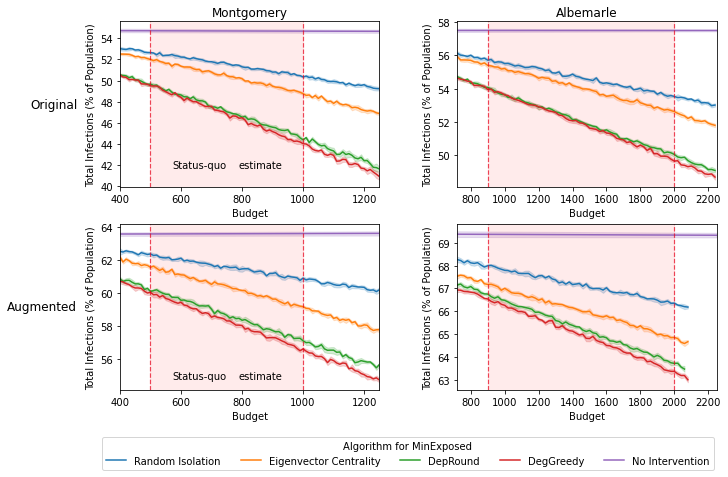

In [4]:
fig, ax = plt.subplots(2,2,figsize=(10,6))

import seaborn as sns

ax0 = sns.lineplot(data=df_mont, x="budget", y="infected", hue="Alg for MinExposed", ax= ax[0, 0])
ax0.get_legend().remove()
ax[0, 0].set_xlabel("Budget")
ax[0, 0].set_ylabel("Total Infections (% of Population)")
ax[0, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].text(660, 42, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 0].text(860, 42, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[0, 0].set_xlim(400,1250)
#ax[0, 0].set_ylim(40,56)

ax1 = sns.lineplot(data=df_cville, x="budget", y="infected", hue="Alg for MinExposed", ax= ax[0, 1])
ax1.get_legend().remove()
ax[0, 1].set_xlabel("Budget")
ax[0, 1].set_ylabel("Total Infections (% of Population)")
ax[0, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 1].axvline(x=2000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[0, 1].text(700, 45, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[0, 1].text(920, 45, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 1].axvspan(900, 2000, alpha=0.08, color='red')
ax[0, 1].set_xlim(720, 2250)
#ax[0, 1].set_ylim(45,60)

ax3 = sns.lineplot(data=df_mont_edges, x="budget", y="infected", hue="Alg for MinExposed", ax= ax[1, 0])
ax3.get_legend().remove()
ax[1, 0].set_xlabel("Budget")
ax[1, 0].set_ylabel("Total Infections (% of Population)")
ax[1, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].text(660, 55, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 0].text(860, 55, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[1, 0].set_xlim(400,1250)
#ax[1, 0].set_ylim(50,65)

ax4 = sns.lineplot(data=df_cville_edges, x="budget", y="infected", hue="Alg for MinExposed", ax=ax[1, 1])
ax4.get_legend().remove()
ax[1, 1].set_xlabel("Budget")
ax[1, 1].set_ylabel("Total Infections (% of Population)")
ax[1, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 1].axvline(x=2000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[1, 1].text(700, 42, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[1, 1].text(920, 42, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 1].axvspan(900, 2000, alpha=0.08, color='red')
ax[1, 1].set_xlim(720, 2250)
#ax[1, 1].set_ylim(50,70)

fig.legend(['Random Isolation','Eigenvector Centrality','DepRound','DegGreedy','No Intervention'],title='Algorithm for MinExposed',loc = "lower center", ncol = 5, bbox_to_anchor = (0.55, -0.1), prop={'size':10})

pad = 5 # in points

ax[0, 0].annotate("Montgomery", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')
ax[0, 1].annotate("Albemarle", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')

ax[0, 0].annotate("Original", xy=(0, 0.5), xytext=(-ax[0, 0].yaxis.labelpad - pad, 0), xycoords= ax[0, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')
ax[1, 0].annotate("Augmented", xy=(0, 0.5), xytext=(-ax[1, 0].yaxis.labelpad - pad, 0), xycoords= ax[1, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')

fig.tight_layout()

fig.subplots_adjust(left=0.15, top=0.95)
plt.subplots_adjust(wspace = 0.3, hspace = 0.22)

#fig.savefig("../output/plots/combined_total_infection.png", dpi=300, bbox_inches = 'tight')
plt.show()

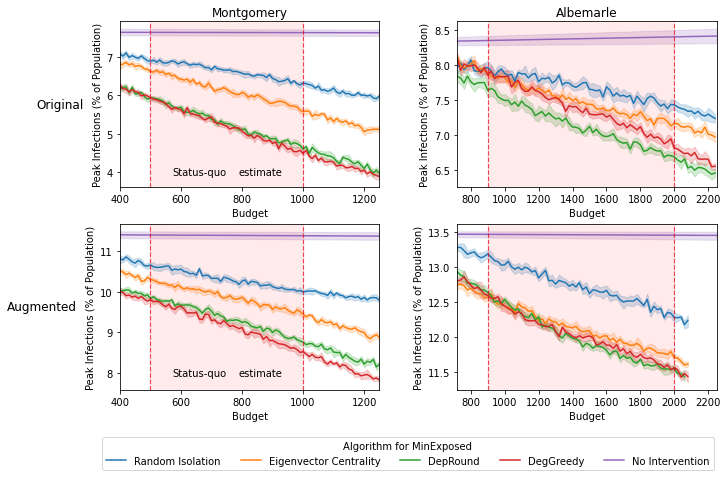

In [5]:
fig, ax = plt.subplots(2,2,figsize=(10,6))
import seaborn as sns

ax0 = sns.lineplot(data=df_mont, x="budget", y="peak", hue="Alg for MinExposed", ax= ax[0, 0])
ax0.get_legend().remove()
ax[0, 0].set_xlabel("Budget")
ax[0, 0].set_ylabel("Peak Infections (% of Population)")
ax[0, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].text(660, 4, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 0].text(860, 4, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[0, 0].set_xlim(400,1250)
#ax[0, 0].set_ylim(40,56)

ax1 = sns.lineplot(data=df_cville, x="budget", y="peak", hue="Alg for MinExposed", ax= ax[0, 1])
ax1.get_legend().remove()
ax[0, 1].set_xlabel("Budget")
ax[0, 1].set_ylabel("Peak Infections (% of Population)")
ax[0, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 1].axvline(x=2000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[0, 1].text(700, 45, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[0, 1].text(920, 45, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0, 1].axvspan(900, 2000, alpha=0.08, color='red')
ax[0, 1].set_xlim(720, 2250)
#ax[0, 1].set_ylim(45,60)

ax3 = sns.lineplot(data=df_mont_edges, x="budget", y="peak", hue="Alg for MinExposed", ax= ax[1, 0])
ax3.get_legend().remove()
ax[1, 0].set_xlabel("Budget")
ax[1, 0].set_ylabel("Peak Infections (% of Population)")
ax[1, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].text(660, 8, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 0].text(860, 8, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[1, 0].set_xlim(400,1250)
#ax[1, 0].set_ylim(50,65)

ax4 = sns.lineplot(data=df_cville_edges, x="budget", y="peak", hue="Alg for MinExposed", ax=ax[1, 1])
ax4.get_legend().remove()
ax[1, 1].set_xlabel("Budget")
ax[1, 1].set_ylabel("Peak Infections (% of Population)")
ax[1, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 1].axvline(x=2000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[1, 1].text(700, 42, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[1, 1].text(920, 42, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 1].axvspan(900, 2000, alpha=0.08, color='red')
ax[1, 1].set_xlim(720, 2250)
#ax[1, 1].set_ylim(50,70)

fig.legend(['Random Isolation','Eigenvector Centrality','DepRound','DegGreedy','No Intervention'],title='Algorithm for MinExposed',loc = "lower center", ncol = 5, bbox_to_anchor = (0.55, -0.1), prop={'size':10})

pad = 5 # in points

ax[0, 0].annotate("Montgomery", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')
ax[0, 1].annotate("Albemarle", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')

ax[0, 0].annotate("Original", xy=(0, 0.5), xytext=(-ax[0, 0].yaxis.labelpad - pad, 0), xycoords= ax[0, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')
ax[1, 0].annotate("Augmented", xy=(0, 0.5), xytext=(-ax[1, 0].yaxis.labelpad - pad, 0), xycoords= ax[1, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center')

fig.tight_layout()
# tight_layout doesn't take these labels into account. We'll need 
# to make some room. These numbers are are manually tweaked. 
# You could automatically calculate them, but it's a pain.
fig.subplots_adjust(left=0.15, top=0.95)
plt.subplots_adjust(wspace = 0.3, hspace = 0.22)
#fig.savefig("../output/plots/combined_peak_infection.png", dpi=300, bbox_inches = 'tight')
plt.show()

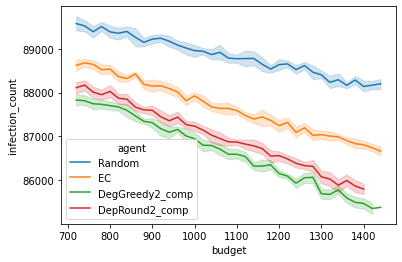

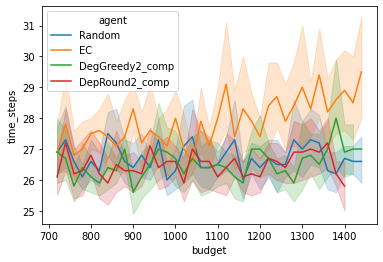

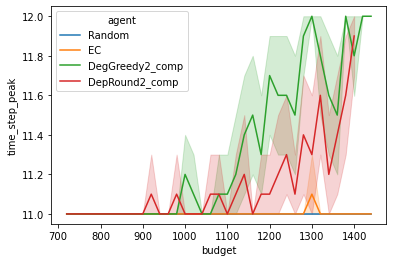

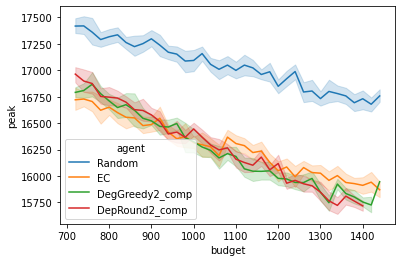

In [3]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_8Etcs" / "results.csv")
#print(df["infections_step"][0].strip("[]").split(", "))
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak"] = df["infection_list"].apply(lambda x: max(x))
import seaborn as sns
sns.lineplot(data=df, x = "budget", y = "infection_count", hue = "agent")
plt.show()
sns.lineplot(data=df, x = "budget", y ="time_steps", hue = "agent")
plt.show()
sns.lineplot(data=df, x = "budget", y ="time_step_peak", hue = "agent")
plt.show()
sns.lineplot(data=df, x = "budget", y ="peak", hue = "agent")
plt.show()

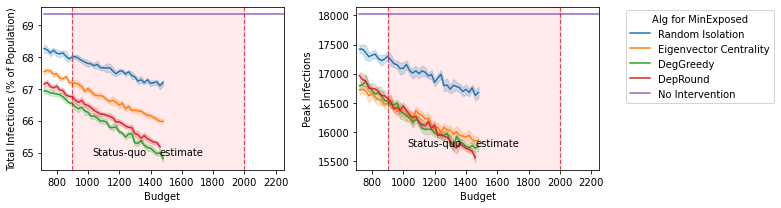

In [40]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_8Etcs" / "results.csv")
df = df.replace({'Random':'Random Sol', 'EC':'Eigenvector Centrality', 'DepRound2_comp':'DepRound', 'DegGreedy2_comp':'DegGreedy'})
df = df.rename(columns={"agent":"Alg for MinExposed"})
df['infected'] = 100.0*df['infection_count']/131219

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak"] = df["infection_list"].apply(lambda x: max(x))

a = df.iloc[[0,1],:].copy()

df_none = pd.read_csv(PROJECT_ROOT / "output" / "run_nk25o" / "results.csv")
df_none["infection_list"] = df_none["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df_none["time_steps"] = df_none["infection_list"].apply(lambda x: len(x))
df_none["time_step_peak"] = df_none["infection_list"].apply(lambda x: x.index(max(x)))
df_none["peak"] = df_none["infection_list"].apply(lambda x: max(x))

average_nointervention_count = df_none['infection_count'].mean()
average_nointervention_peak = df_none['peak'].mean()

#average over 10 then plug in and hardcode
a.loc[[0],['budget']] = 2250
a.loc[0,'infected'] = 100.0*average_nointervention_count/131219
a.loc[1,'infected'] = 100.0*average_nointervention_count/131219
a.loc[0,'peak'] = average_nointervention_peak
a.loc[1,'peak'] = average_nointervention_peak
a.loc[[1],['Alg for MinExposed']] = 'No Intervention'
a.loc[[0],['Alg for MinExposed']] = 'No Intervention'

df = pd.concat([df,a]).reset_index()

fig, ax = plt.subplots(1,2,figsize=(10,3))
plt.subplots_adjust(wspace = .3)

import seaborn as sns

ax0 = sns.lineplot(data=df, x="budget", y="infected", hue="Alg for MinExposed", ax=ax[0])
ax0.get_legend().remove()
ax[0].set_xlabel("Budget")
ax[0].set_ylabel("Total Infections (% of Population)")
ax[0].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0].axvline(x=2000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0].text(1200, 65, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0].text(1600, 65, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0].axvspan(900, 2000, alpha=0.08, color='red')
ax[0].set_xlim(700,2250)
#ax[0].legend(loc="right", bbox_to_anchor=(1.8,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_total.png', dpi=300)

ax1 = sns.lineplot(data=df, x="budget", y="peak", hue="Alg for MinExposed", ax=ax[1])
ax1.get_legend().remove()
ax[1].set_xlabel("Budget")
ax[1].set_ylabel("Peak Infections")
ax[1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1].axvline(x= 2000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1].text(1200, 15800, 'Status-quo', fontsize=10, verticalalignment='center', horizontalalignment='center')
ax[1].text(1600, 15800, 'estimate', fontsize=10, verticalalignment='center', horizontalalignment='center')
ax[1].axvspan(900, 2000, alpha=0.08, color='red')
ax[1].set_xlim(700,2250)
#ax[1].legend(loc="right", bbox_to_anchor=(1.5,.65), title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_peak.png', dpi=300)

fig.legend(['Random Isolation','Eigenvector Centrality','DegGreedy','DepRound','No Intervention'],title='Alg for MinExposed',loc="right", bbox_to_anchor=(1.15,.65), prop={'size':10})
#fig.savefig("../output/plots/combined_mont_budget_compliance.png", dpi=300, bbox_inches = 'tight')
plt.show()

In [44]:
#Yoc5o

G = load_graph_montgomery_labels()
state = InfectionState(G, (list(), list(), list(), list()), 0, "none", 0.05, 0.8)

print(np.mean(np.array(list(nx.get_node_attributes(G, 'compliance_rate').values()))))

0.7999999999999999


0          DegGreedy Full Knowledge
1          DegGreedy Full Knowledge
2          DegGreedy Full Knowledge
3          DegGreedy Full Knowledge
4          DegGreedy Full Knowledge
                   ...             
1015    DepRound Average Compliance
1016    DepRound Average Compliance
1017    DepRound Average Compliance
1018    DepRound Average Compliance
1019    DepRound Average Compliance
Name: Alg for MinExposed, Length: 3060, dtype: object


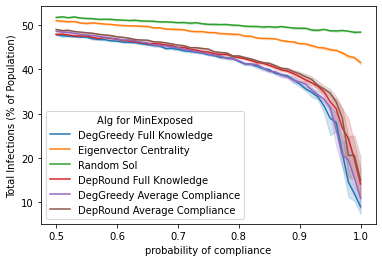

In [13]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_Yoc5o" / "results.csv")
df_avg_compliance = pd.read_csv(PROJECT_ROOT / "output" / "run_ZXFtb" / "results.csv")
df_avg_both = pd.read_csv(PROJECT_ROOT / "output" / "run_HPtb6" / "results.csv")
df = pd.concat([df, df_avg_compliance])

df['infected'] = 100.0*df['infection_count']/75457
df['probability of compliance'] = df["compliance_rate"]
df = df.replace({'Random':'Random Sol', 'EC':'Eigenvector Centrality', 'DepRound2_comp':'DepRound Full Knowledge', 'DegGreedy2_comp':'DegGreedy Full Knowledge', 'DepRound2':'DepRound Average Compliance', 'DegGreedy2':'DegGreedy Average Compliance'})
df = df.rename(columns={"agent":"Alg for MinExposed"})
print(df["Alg for MinExposed"])

#df_avg_compliance = pd.read_csv(PROJECT_ROOT / "output" / "run_VBFyE" / "results.csv")
#COMPLIANCE
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak"] = df["infection_list"].apply(lambda x: max(x))

import seaborn as sns
sns.lineplot(data=df, x = "probability of compliance", y = "infected", hue = "Alg for MinExposed")
plt.ylabel("Total Infections (% of Population)")
plt.savefig("../output/plots/mont_compliance_sensitive.png", dpi=300, bbox_inches = 'tight')
plt.show()

#sns.lineplot(data=df, x = "compliance_rate", y ="time_steps", hue = "agent")
#plt.show()
#sns.lineplot(data=df, x = "compliance_rate", y ="time_step_peak", hue = "agent")
#plt.show()
#sns.lineplot(data=df, x = "compliance_rate", y ="peak", hue = "agent")
#plt.show()

In [36]:
from ctrace.utils import *

G = load_graph_montgomery_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 1000, "none", 0.05, 0.8, True)
while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    state.step(DepRound2_avg(state))
    print(len(state.SIR.R))

372
794
1471
2495
3827
5564
7684
10495
13823
17570
21287
24832
27692
30088
31763
32894
33631
34071
34299
34409
34470
34499
34521
34533
34534
34537


In [20]:
from ctrace.utils import *
import collections

G = load_graph_montgomery_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 500, "equal", 0.05, True, 0.8, True)
while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    q = DepRound2_fair(state)
    print("ALLOCATIONS: " + str(state.budget_labels))
    print("DISTRIBUTIONS: " + str(collections.Counter([state.G.nodes[node]["age_group"] for node in q])))
    state.step(q)
    print(len(state.SIR.R))

ALLOCATIONS: [215, 86, 101, 24, 71]
DISTRIBUTIONS: Counter({0: 215, 2: 101, 1: 86, 4: 71, 3: 24})
341
ALLOCATIONS: [214, 87, 102, 23, 72]
DISTRIBUTIONS: Counter({0: 214, 2: 102, 1: 87, 4: 72, 3: 23})
610
ALLOCATIONS: [215, 83, 99, 26, 74]
DISTRIBUTIONS: Counter({0: 215, 2: 99, 1: 83, 4: 74, 3: 26})
1115
ALLOCATIONS: [215, 81, 105, 22, 74]
DISTRIBUTIONS: Counter({0: 215, 2: 105, 1: 81, 4: 74, 3: 22})
1727
ALLOCATIONS: [213, 80, 101, 25, 77]
DISTRIBUTIONS: Counter({0: 213, 2: 101, 1: 80, 4: 77, 3: 25})
2570
ALLOCATIONS: [213, 80, 102, 25, 76]
DISTRIBUTIONS: Counter({0: 213, 2: 102, 1: 80, 4: 76, 3: 25})
3732
ALLOCATIONS: [213, 80, 103, 25, 77]
DISTRIBUTIONS: Counter({0: 213, 2: 103, 1: 80, 4: 77, 3: 25})
5318
ALLOCATIONS: [214, 82, 103, 25, 74]
DISTRIBUTIONS: Counter({0: 214, 2: 103, 1: 82, 4: 74, 3: 25})
7508
ALLOCATIONS: [214, 82, 103, 25, 73]
DISTRIBUTIONS: Counter({0: 214, 2: 103, 1: 82, 4: 73, 3: 25})
10325
ALLOCATIONS: [212, 82, 105, 25, 74]
DISTRIBUTIONS: Counter({0: 212, 2: 105, 

In [ ]:
from ctrace.utils import *
import collections

G = load_graph_montgomery_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 500, "old", 0.05, True, 0.8, True)
while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    q = DegGreedy2_fair(state)
    print("ALLOCATIONS: " + str(state.budget_labels))
    print("DISTRIBUTIONS: " + str(collections.Counter([state.G.nodes[node]["age_group"] for node in q])))
    state.step(q)
    print(len(state.SIR.R))

ALLOCATIONS: [183, 147, 86, 20, 61]
DISTRIBUTIONS: Counter({0: 183, 1: 147, 2: 86, 4: 61, 3: 20})
341
ALLOCATIONS: [184, 140, 90, 20, 63]
DISTRIBUTIONS: Counter({0: 184, 1: 140, 2: 90, 4: 63, 3: 20})
610
ALLOCATIONS: [192, 132, 90, 21, 63]
DISTRIBUTIONS: Counter({0: 192, 1: 132, 2: 90, 4: 63, 3: 21})
1121
ALLOCATIONS: [188, 136, 89, 20, 65]
DISTRIBUTIONS: Counter({0: 188, 1: 136, 2: 89, 4: 65, 3: 20})
1731
ALLOCATIONS: [188, 135, 88, 22, 65]
DISTRIBUTIONS: Counter({0: 188, 1: 135, 2: 88, 4: 65, 3: 22})
2601
ALLOCATIONS: [184, 137, 90, 22, 65]
DISTRIBUTIONS: Counter({0: 184, 1: 137, 2: 90, 4: 65, 3: 22})
3879
ALLOCATIONS: [182, 137, 91, 22, 65]
DISTRIBUTIONS: Counter({0: 182, 1: 137, 2: 91, 4: 65, 3: 22})
5660
ALLOCATIONS: [183, 137, 89, 22, 65]
DISTRIBUTIONS: Counter({0: 183, 1: 137, 2: 89, 4: 65, 3: 22})
8065
ALLOCATIONS: [183, 138, 89, 23, 64]
DISTRIBUTIONS: Counter({0: 183, 1: 138, 2: 89, 4: 64, 3: 23})
11238
ALLOCATIONS: [183, 138, 88, 23, 65]
DISTRIBUTIONS: Counter({0: 183, 1: 138

In [35]:
from ctrace.utils import *

G = load_graph_montgomery_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 1000, "none", 0.05, 0.8, True)
while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    state.step(DegGreedy2_avg(state))
    print(len(state.SIR.R))

341
610
1077
1556
2166
2865
3833
5018
6575
8463
10769
13465
16489
19564
22649
25387
27634
29392
30636
31493
32067
32394
32593
32681
32720
32738
32750
32758
32764
32769
32776
32778
32782


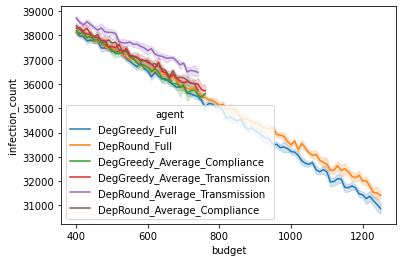

In [62]:
#df_avg_transmission = pd.read_csv(PROJECT_ROOT / "output" / "run_Eoacb" / "results.csv")
df = pd.read_csv(PROJECT_ROOT / "output" / "run_XkskM" / "results.csv")
#df_avg_comp = pd.read_csv(PROJECT_ROOT / "output" / "run_WSsFk" / "results.csv")
df_avg = pd.read_csv(PROJECT_ROOT / "output" / "run_7uPib" / "results.csv")
df_avg_both = pd.read_csv(PROJECT_ROOT / "output" / "run_D37XR" / "results.csv").replace({'DepRound2_fair':'DepRound_Average_Both', 'DegGreedy2_fair':'DegGreedy_Average_Both'})
#df_avg_comp = pd.read_csv(PROJECT_ROOT / "output" / "run_UpjBz" / "results.csv")

df = pd.concat([df, df_avg, df_avg_both])
#df = pd.concat([df_avg_transmission, df_avg_comp])
df = df.replace({'DepRound2_comp':'DepRound_Full', 'DegGreedy2_comp':'DegGreedy_Full', 'DepRound2_avg':'DepRound_Average_Transmission', 'DegGreedy2_avg':'DegGreedy_Average_Transmission', 'DegGreedy2': 'DegGreedy_Average_Compliance', 'DepRound2': 'DepRound_Average_Compliance'})
df = df[(df["agent"]!="Random") & (df["agent"]!="EC")]
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak"] = df["infection_list"].apply(lambda x: max(x))
import seaborn as sns
sns.lineplot(data=df, x = "budget", y = "infection_count", hue = "agent")
plt.show()
#sns.lineplot(data=df, x = "budget", y ="time_steps", hue = "agent")
#plt.show()
#sns.lineplot(data=df, x = "budget", y ="time_step_peak", hue = "agent")
#plt.show()
#sns.lineplot(data=df, x = "budget", y ="peak", hue = "agent")
#plt.show()

341
610
1060
1448
1860
2295
2719
3165
3564
3979
4333
4689
4993
5256
5486
5672
5811
5910
5972
6014
6032
6045
6053
6062


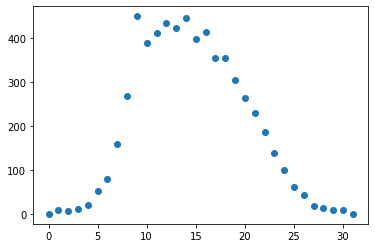

In [29]:
from ctrace.utils import *

G = load_graph_montgomery_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 1000, "none", 0.05, 1, True)

while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    state.step(DegGreedy2_comp(state))
    infections.append(len(state.SIR.I2))
    print(len(state.SIR.R))

plt.scatter([i for i in range(len(infections))],infections)

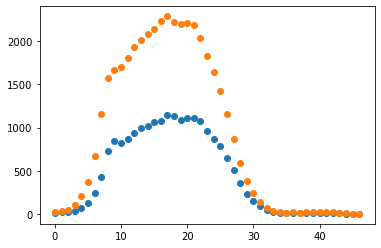

In [19]:
plt.scatter([i for i in range(len(infections))], infections)
infection2 = infections
for i in range(1, len(infections)):
    infection2[i-1] += infections[i]
plt.scatter([i for i in range(len(infection2))], infection2)

In [ ]:
#FULL INFO: 8763
#AVG TRANS:
#AVG COMP:
#AVG BOTH:
from ctrace.utils import *

G = load_graph_montgomery_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 1000, "none", 0.05, False, 1, True)

while len(state.SIR.I1 )+ len(state.SIR.I2)!=0:
    q = DepRound2_fair(state)
    state.step(q)
    infections.append(len(state.SIR.I2))
    print(len(state.SIR.R))

341
610
1082
1537
2028
2566
3197
3889
4709
5644
6826


In [64]:
#TESTS: E9SPC
#TEST COMPLIANCE: XnGd5
df = pd.read_csv(PROJECT_ROOT / "output" / "run_E9SPC" / "results.csv")
#print(df[(df["agent"]=="DegGreedy2_fair") & (df["compliance_known"]==True) & (df["transmission_known"]==True)])
print("DEG FULL " + str(df[(df["agent"]=="DegGreedy2_fair") & (df["compliance_known"]==True)&(df["transmission_known"]==False)]["infection_count"].mean()))
print("DEG AVG TRANS " + str(df[(df["agent"]=="DegGreedy2_fair") & (df["compliance_known"]==True)&(df["transmission_known"]==True)]["infection_count"].mean()))
print("DEG AVG COMP " + str(df[(df["agent"]=="DegGreedy2_fair") & (df["compliance_known"]==False)&(df["transmission_known"]==False)]["infection_count"].mean()))
print("DEG AVG BOTH " + str(df[(df["agent"]=="DegGreedy2_fair") & (df["compliance_known"]==False)&(df["transmission_known"]==True)]["infection_count"].mean()))

print("__________________")

print("DEP FULL " + str(df[(df["agent"]=="DepRound2_fair") & (df["compliance_known"]==True)&(df["transmission_known"]==True)]["infection_count"].mean()))
print("DEP AVG TRANS " + str(df[(df["agent"]=="DepRound2_fair") & (df["compliance_known"]==True)&(df["transmission_known"]==False)]["infection_count"].mean()))
print("DEP AVG COMP " + str(df[(df["agent"]=="DepRound2_fair") & (df["compliance_known"]==False)&(df["transmission_known"]==True)]["infection_count"].mean()))
print("DEP AVG BOTH " + str(df[(df["agent"]=="DepRound2_fair") & (df["compliance_known"]==False)&(df["transmission_known"]==False)]["infection_count"].mean()))


DEG FULL 31475.2
DEG AVG TRANS 32574.0
DEG AVG COMP 31528.4
DEG AVG BOTH 32084.4
__________________
DEP FULL 32117.0
DEP AVG TRANS 33740.4
DEP AVG COMP 32501.4
DEP AVG BOTH 33892.0


In [17]:
#TESTS: E9SPC
#TEST COMPLIANCE: XnGd5
df = pd.read_csv(PROJECT_ROOT / "output" / "run_XnGd5" / "results.csv")
#print(df[(df["agent"]=="DegGreedy2_fair") & (df["compliance_known"]==True) & (df["transmission_known"]==True)])

print("DEG FULL " + str(df[(df["agent"]=="DegGreedy2_fair") & (df["compliance_known"]==True)&(df["transmission_known"]==True)]["infection_count"].mean()))
print("DEG AVG COMP " + str(df[(df["agent"]=="DegGreedy2_fair") & (df["compliance_known"]==False)&(df["transmission_known"]==True)]["infection_count"].mean()))

print("__________________")

print("DEP FULL " + str(df[(df["agent"]=="DepRound2_fair") & (df["compliance_known"]==True)&(df["transmission_known"]==True)]["infection_count"].mean()))
print("DEP AVG COMP " + str(df[(df["agent"]=="DepRound2_fair") & (df["compliance_known"]==False)&(df["transmission_known"]==True)]["infection_count"].mean()))

DEG FULL 8500.8
DEG AVG COMP 8404.0
__________________
DEP FULL 9902.0
DEP AVG COMP 12067.6


In [39]:
from ctrace.utils import *

G = load_graph_montgomery_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 500, "equal", 0.05, True, 1, True, 0.5, 0.5)

def pq_independent(G: nx.Graph, I: Iterable[int], V1: Iterable[int], V2: Iterable[int], Q_state, p: float):
    # Returns dictionary P, Q
    # Calculate P, (1-P) ^ [number of neighbors in I]
    P = {v: (1 - math.pow((1 - p), len(set(G.neighbors(v)) & set(I)))) if v in V1 else 0 for v in set(V1|V2)}
    Q = {}
    for key, values in Q_state.items():
        Q[key] = {v: p if values[v]!=0 else 0 for v in values.keys()}
    #Q = defaultdict(lambda: defaultdict(lambda: p)) # Q[-1][0] = p
    return P, Q

P,Q = pq_independent(state.G, state.SIR.I2, state.V1, state.V2, state.Q, state.transmission_rate)

zeroes = [(u, v) for u in state.V1 for v in state.V2 if u in state.Q and v in state.Q[u] and state.Q[u][v] == 0]
zeroes2 = [(u, v) for u in state.V1 for v in state.V2 if u in Q and v in Q[u] and Q[u][v] == 0]

print(len(zeroes), len(zeroes2))

13606 13606


In [40]:
print(set(zeroes)- set(zeroes2))

set()


In [ ]:
def calculateExpected(state: InfectionState, quarantine):
    #P, Q = pq_independent(state.G, state.SIR.I2, state.V1, state.V2, state.Q, state.transmission_rate)
    P, Q = state.P, state.Q
    total = 0
    for v in state.V2:
        expected = 1
        for u in (set(state.G.neighbors(v)) & state.V1):
            if u not in quarantine:
                expected *= (1-P[u]*Q[u][v])
            else:
                expected *= (1-(1-state.G.nodes[u]['compliance_rate'])*P[u]*Q[u][v])
        
        if v in quarantine:
            total += (1-P[v])*(1-expected)*(1-state.G.nodes[v]['compliance_rate'])
        else:
            total += (1-P[v])*(1-expected)
    return total

G = load_graph_montgomery_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
            j = json.load(infile)
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]

state = InfectionState(G, (S, I1, I2, R), 1000, "none", 0.05, False, 1, True)

print(calculateExpected(state, set()))
print(calculateExpected(state, DegGreedy2_label(state)))